In [ ]:
!nvidia-smi

Fri Jan 24 12:29:05 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Installing necessary packages

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


# Importing necessary packages

In [ ]:
from roboflow import Roboflow
import random
from IPython.display import Image
from IPython.display import display as disp
import torch
import cv2
import locale
from PIL import Image as ImagePIL

## Set locale to UTF-8 if CLI code is to be used

In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

## Use GPU if available, else use CPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Downloading Roboflow dataset

In [ ]:
if not os.path.isdir(os.path.join(HOME, 'datasets')):
    os.mkdir(os.path.join(HOME, 'datasets'))
os.chdir(os.path.join(HOME, 'datasets'))

rf = Roboflow(api_key="M11OK0bZkXvcy3y2hb2k")
project = rf.workspace("computer-vision-2024-assignment").project("waste-bag-detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Bag-Detection-3 in yolov8:: 100%|██████████| 1934/1934 [00:01<00:00, 1517.81it/s]


# Training YOLOv8 model on custom dataset

## Setting parameters for training

In [ ]:
num_epochs = 100
image_size = 960
batch_size = 8
learning_rate = 0.001

model_path = 'yolov8s.pt'
yaml_path = f'{dataset.location}/data.yaml'

CLI version

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model={model_path} data={yaml_path} epochs={num_epochs} imgsz={image_size} batch={batch_size} device={device} workers=4 optimizer=Adam cache=True rect=True patience=15 weight_decay=0.0005 lr0={learning_rate} momentum=0.9 dropout=0.5 plots=True val=True

Python YOLO version

In [ ]:
%cd {HOME}

model = ultralytics.YOLO(model_path)

train_config = {
    'data': yaml_path,
    'imgsz': image_size,
    'batch': batch_size,
    'epochs': num_epochs,
    'device': device,  # Use CPU/GPU depending on GPU availability
    'workers': 4,  # Number of data loading workers
    'optimizer': 'Adam',  # Use Adam optimizer
    'cache': True,  # Cache images for faster training
    'rect': True,  # Use rectangle images
    'patience': 15,  # epochs to wait before decreasing LR
    'weight_decay': 0.0005,  # Weight decay
    'lr0': learning_rate,  # Initial learning rate
    'momentum': 0.9,  # Momentum
    'dropout': 0.5,  # Dropout rate
    'val': True,  # Run validation during training
    'plots': True,  # Run plots during training
}

model.train(**train_config)

/content


100%|██████████| 21.5M/21.5M [00:00<00:00, 39.9MB/s]

New https://pypi.org/project/ultralytics/8.3.67 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Waste-Bag-Detection-3/data.yaml, epochs=100, time=None, patience=15, batch=8, imgsz=960, save=True, save_period=-1, cache=True, device=cuda, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

100%|██████████| 755k/755k [00:00<00:00, 146MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 331MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Waste-Bag-Detection-3/train/labels... 880 images, 5 backgrounds, 0 corrupt: 100%|██████████| 880/880 [00:00<00:00, 2357.28it/s]

train: New cache created: /content/datasets/Waste-Bag-Detection-3/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.7GB RAM): 100%|██████████| 880/880 [00:17<00:00, 50.70it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/Waste-Bag-Detection-3/valid/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 1782.67it/s]

val: New cache created: /content/datasets/Waste-Bag-Detection-3/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 45/45 [00:00<00:00, 53.84it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 960 train, 960 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.66G      1.353      3.844       1.52         14        672: 100%|██████████| 110/110 [00:34<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]


                   all         45         97      0.414      0.262      0.216       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.56G      1.376       2.08       1.49         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         45         97      0.566      0.392      0.376      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.59G      1.376      1.883        1.5         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         45         97      0.476      0.526      0.605      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.61G      1.367      1.726      1.475         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         45         97      0.703      0.354      0.297      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.58G      1.323      1.778      1.446         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         45         97      0.664        0.5      0.473        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.55G      1.336      1.537      1.433         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         45         97      0.665      0.473       0.46      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.58G      1.298      1.483      1.388         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         45         97      0.577      0.612      0.582      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.59G      1.277      1.416      1.383         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         45         97      0.672      0.515      0.534      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.6G      1.226      1.301      1.349         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         45         97      0.767      0.491      0.613      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.56G      1.227      1.218       1.33         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         45         97      0.811      0.549      0.614      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.58G      1.209      1.194      1.315         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         45         97       0.76      0.563      0.597      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.57G      1.175      1.127      1.308         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         45         97      0.697      0.587      0.643      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.59G      1.156      1.101      1.296         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         45         97      0.772      0.581      0.634      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.37G      1.157       1.13      1.293         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         45         97      0.736      0.615      0.603      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.6G      1.162      1.084      1.292         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         45         97      0.806      0.578       0.61      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.59G      1.151      1.027       1.28         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         45         97        0.8      0.584      0.661      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.53G        1.1     0.9696      1.255         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         45         97      0.791      0.661      0.658      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.54G      1.091     0.9368      1.248         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         45         97      0.831      0.628      0.682      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.62G      1.074     0.9805      1.247         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         45         97      0.809      0.548      0.585      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.58G      1.087     0.9484      1.257         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         45         97      0.766       0.62      0.647      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.59G      1.061     0.8935      1.219         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         45         97      0.811      0.676       0.69      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.52G      1.056     0.8956      1.215         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         45         97      0.847      0.666      0.705      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.36G      1.023     0.8612      1.189         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         45         97      0.924      0.545      0.644      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.6G      1.023     0.8639      1.197         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]

                   all         45         97       0.84      0.553      0.612      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       4.6G      1.001     0.8745      1.185         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         45         97      0.852      0.573      0.685      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.54G      0.972     0.7851      1.158         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         45         97      0.854      0.668      0.662      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.51G      0.974      0.813      1.159         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         45         97      0.905      0.594       0.66      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.58G       1.01       0.78      1.186         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         45         97       0.88      0.671      0.707      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.59G     0.9872     0.7848      1.176         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         45         97      0.823      0.595      0.641      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.56G     0.9665     0.7909       1.16         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         45         97      0.916      0.629      0.683      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.57G     0.9429     0.7589      1.142         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         45         97      0.879      0.595      0.699      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.58G     0.9755      0.782      1.165         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         45         97      0.847      0.637       0.79      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.58G     0.9626     0.7483      1.157         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         45         97      0.772      0.581      0.642      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.46G      0.918      0.706       1.13         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         45         97      0.837       0.65      0.682      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.57G     0.9075     0.6452      1.123         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         45         97       0.88      0.603      0.684       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.57G     0.9215     0.6608      1.137         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]

                   all         45         97      0.803      0.611      0.667      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.56G     0.9014     0.6362      1.114         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         45         97      0.781      0.611      0.634       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.55G     0.8915      0.643      1.106         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         45         97      0.823       0.66      0.724      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.45G      0.888     0.6248      1.107         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         45         97      0.887      0.668      0.747      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.47G     0.8726     0.6008       1.09         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         45         97      0.665      0.836      0.765       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.45G     0.8508      0.591      1.086         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         45         97      0.865      0.692      0.744      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.56G     0.8258     0.5668      1.073         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]


                   all         45         97      0.902      0.619       0.71      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.54G     0.8232     0.5543      1.066         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         45         97      0.572      0.913      0.756      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.46G      0.848     0.5585      1.084         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         45         97      0.937      0.638      0.718      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.58G     0.8122     0.5113      1.063         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         45         97      0.612      0.889       0.79      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.36G     0.8221     0.5359      1.071         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         45         97      0.929      0.659      0.716       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.46G     0.8021     0.5247      1.047         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         45         97      0.749      0.903      0.903      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.57G     0.8177     0.5357      1.055         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


                   all         45         97      0.942      0.593      0.716      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.58G     0.7947     0.5135      1.048         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         45         97      0.714       0.87      0.799      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.46G     0.7702     0.4946      1.041         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         45         97      0.851       0.81      0.901      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.58G     0.7931     0.5134      1.047         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         45         97      0.783      0.857      0.905      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.56G     0.7997       0.48      1.054         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         45         97      0.825      0.784      0.859      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.58G     0.8242     0.5028      1.053         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]

                   all         45         97      0.706       0.86      0.815      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.54G     0.8989     0.5211       1.08         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         45         97      0.694      0.898      0.784      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.59G     0.8821     0.4838      1.082         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         45         97      0.688      0.701      0.741      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.59G     0.8328     0.4819      1.055         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         45         97       0.68      0.846      0.764      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.51G       0.78     0.4599      1.042         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         45         97      0.614       0.92      0.768      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.52G     0.7403     0.4373      1.018         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         45         97      0.702      0.682      0.734      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.59G     0.7376     0.4418      1.008         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         45         97      0.934      0.669      0.727      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.47G     0.7272     0.4378      1.005         14        672: 100%|██████████| 110/110 [00:27<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         45         97      0.951      0.656       0.74      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.59G     0.7132      0.416          1         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         45         97      0.903      0.721      0.785      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.56G     0.6964     0.4093     0.9988         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         45         97      0.944       0.67      0.753      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.62G     0.6843     0.3935     0.9793         14        672: 100%|██████████| 110/110 [00:31<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         45         97      0.889      0.678      0.754      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.53G     0.6786     0.3891     0.9825         14        672: 100%|██████████| 110/110 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]


                   all         45         97      0.739      0.655      0.742      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.6G     0.6652     0.3946     0.9729         14        672: 100%|██████████| 110/110 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         45         97      0.701      0.677      0.717      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.37G     0.6763     0.4014     0.9775         14        672: 100%|██████████| 110/110 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         45         97      0.744      0.793      0.793      0.586
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 51, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



66 epochs completed in 0.574 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


                   all         45         97      0.782      0.857      0.905      0.666
                 mixed         15         26      0.793          1      0.929      0.686
         organic-green          1          1      0.583          1      0.995      0.597
         organic-white         13         35      0.819      0.771      0.843      0.569
                 other          7          9      0.759      0.667      0.885      0.761
            recyclable         17         26      0.959      0.846      0.873      0.717
Speed: 0.6ms preprocess, 8.6ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a87f8c1f650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Validating model on the validation set

CLI version

In [ ]:
!yolo detect val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Python version

In [ ]:
model = ultralytics.YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

model.val(data=f'{dataset.location}/data.yaml')

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets/Waste-Bag-Detection-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


                   all         45         97      0.777      0.857      0.905      0.667
                 mixed         15         26      0.793          1      0.929      0.689
         organic-green          1          1      0.555          1      0.995      0.597
         organic-white         13         35      0.819      0.771      0.841      0.569
                 other          7          9      0.758      0.667      0.885      0.761
            recyclable         17         26      0.959      0.846      0.873      0.717
Speed: 0.8ms preprocess, 24.1ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a88cd62d290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Validating model on the test set

CLI version

In [ ]:
!yolo detect val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml split=test

Python version

In [ ]:
model = ultralytics.YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

model.val(split='test', data=f'{dataset.location}/data.yaml')

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets/Waste-Bag-Detection-3/test/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 304.86it/s]

val: New cache created: /content/datasets/Waste-Bag-Detection-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


                   all         36         86      0.822      0.739      0.835      0.626
                 mixed         14         33      0.842      0.806      0.933       0.66
         organic-white          7         18      0.965      0.722      0.854      0.543
                 other          5          9      0.833          1      0.895      0.694
            recyclable         13         24      0.941      0.667      0.906      0.759
      recyclable-green          1          2       0.53        0.5      0.586      0.473
Speed: 1.0ms preprocess, 37.6ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a87f478c390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Retrieving results from model training

## Confusion matrix

/content


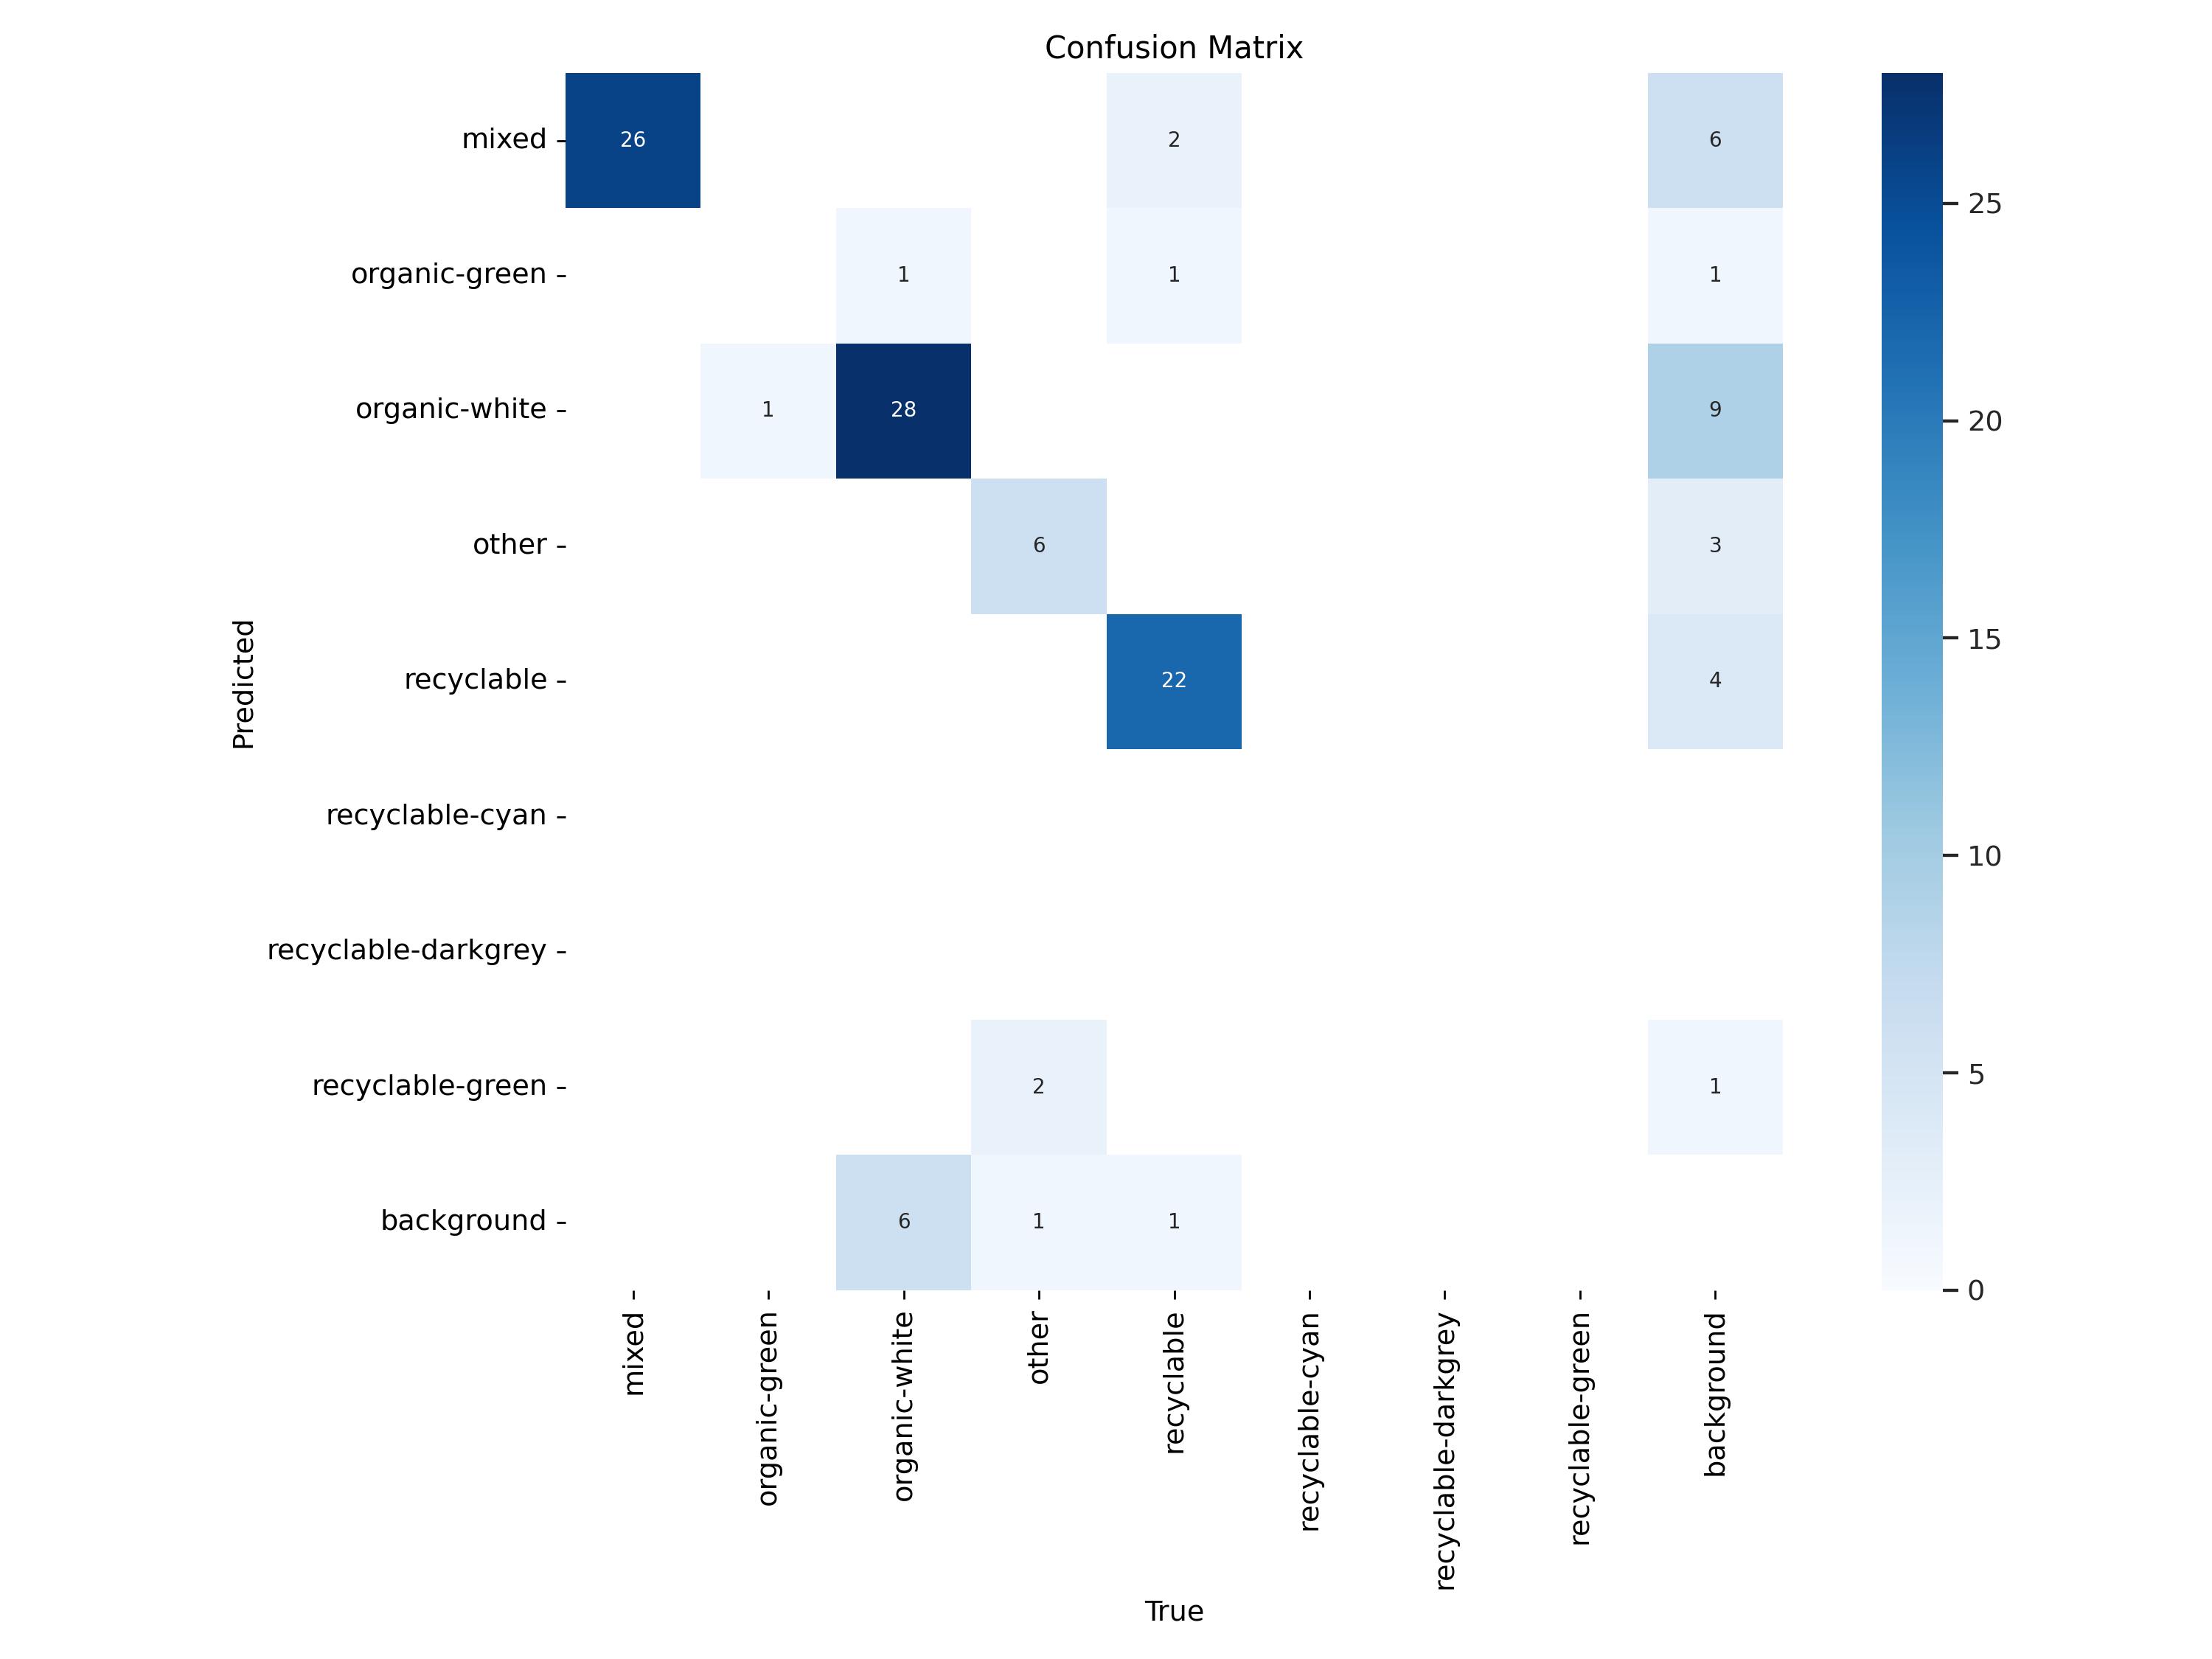

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Graphs from training results (F1-Score, Loss, Precision, Recall)

/content


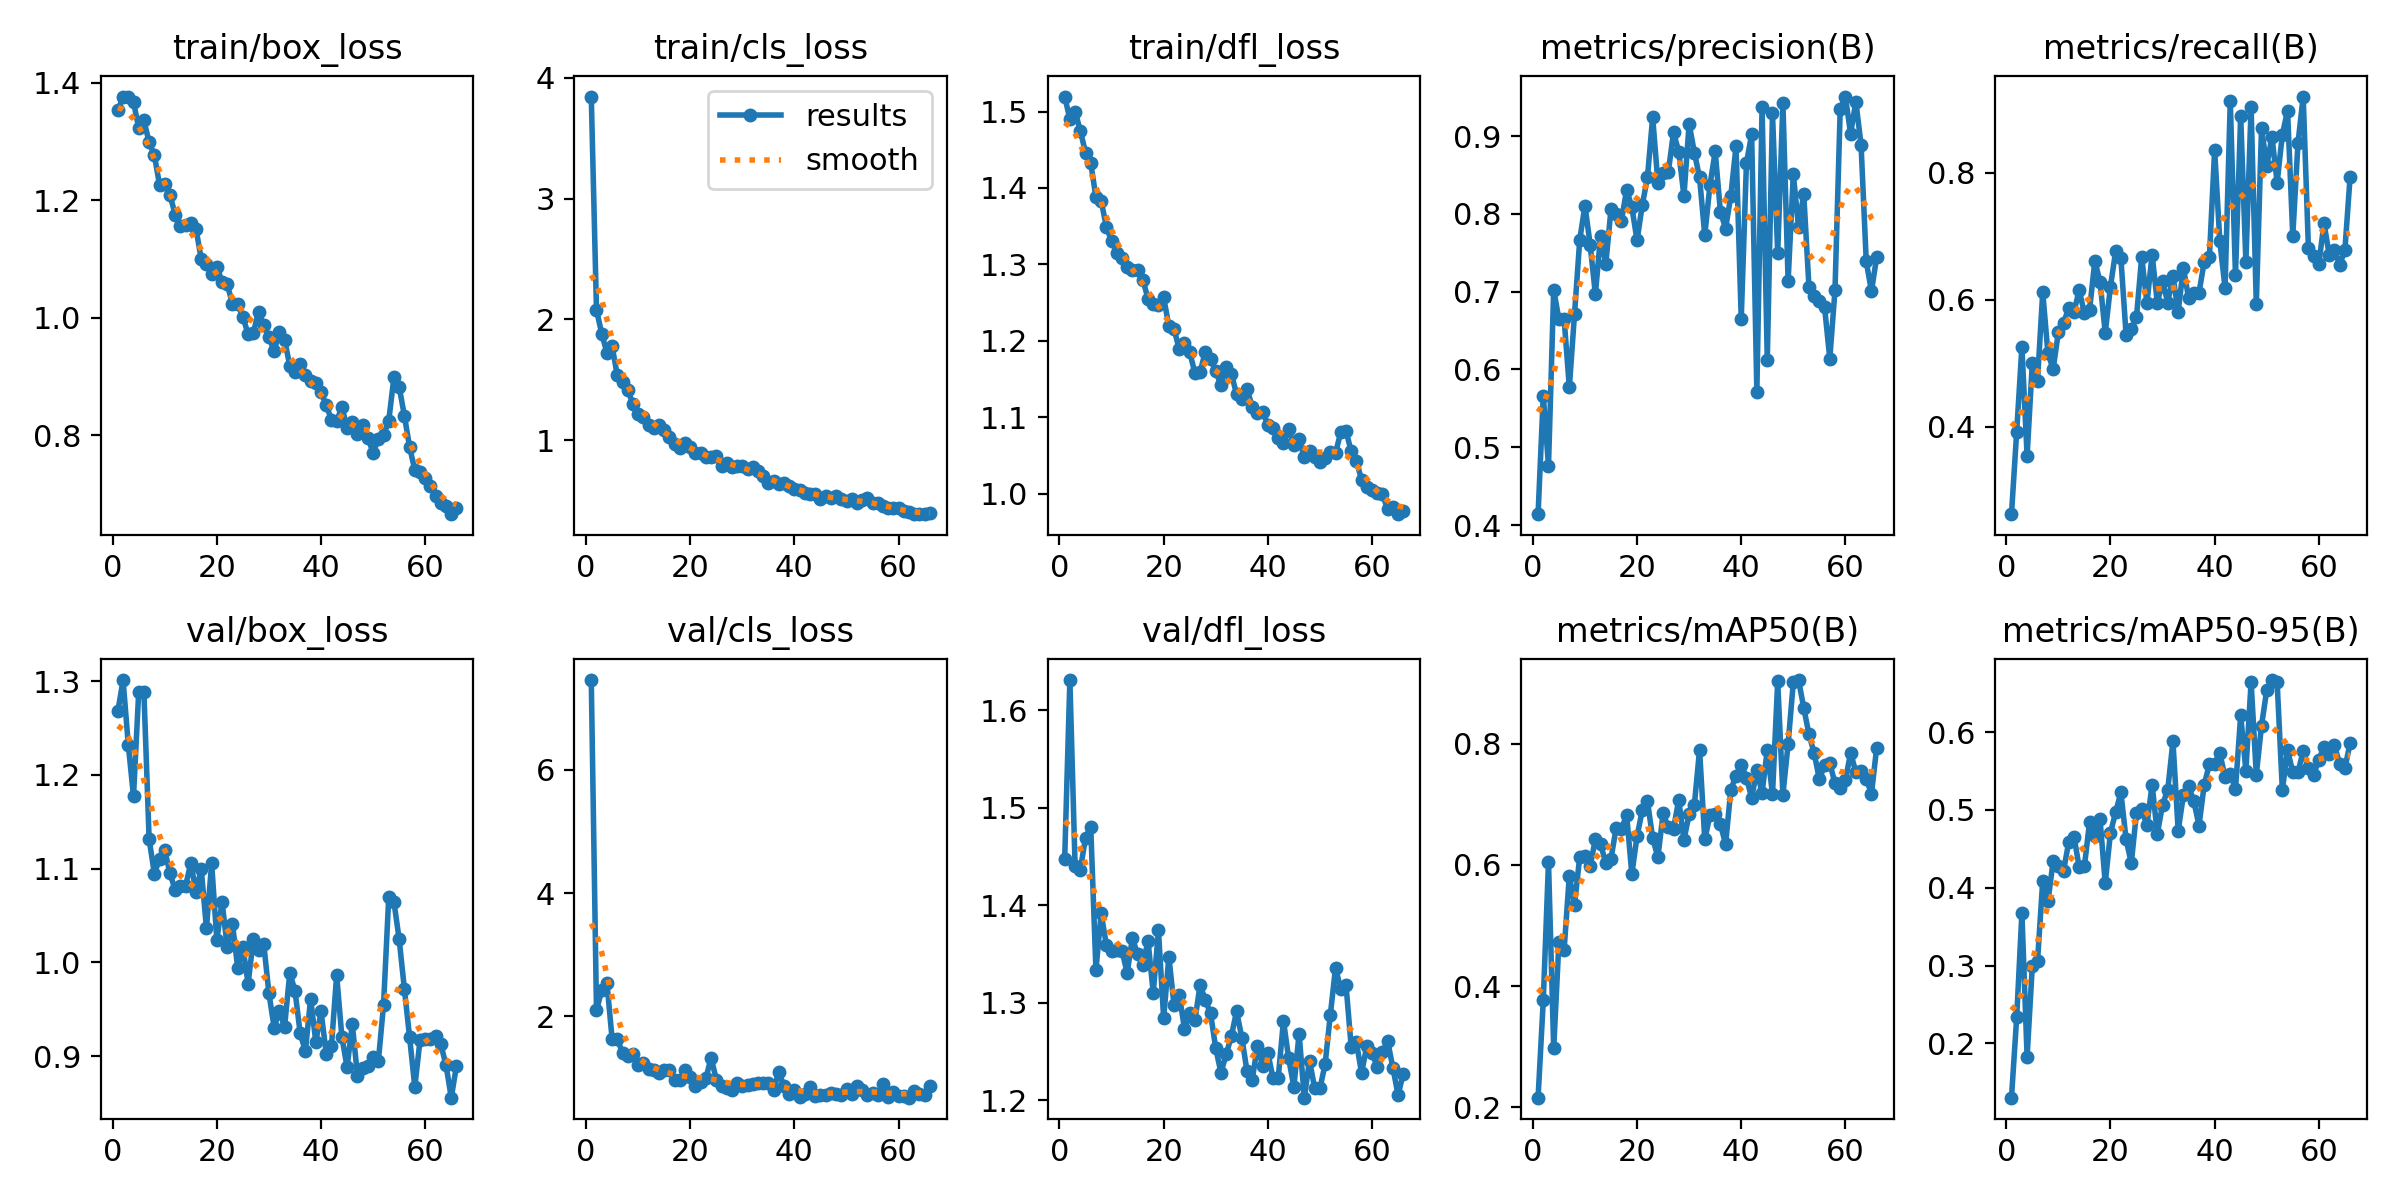

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


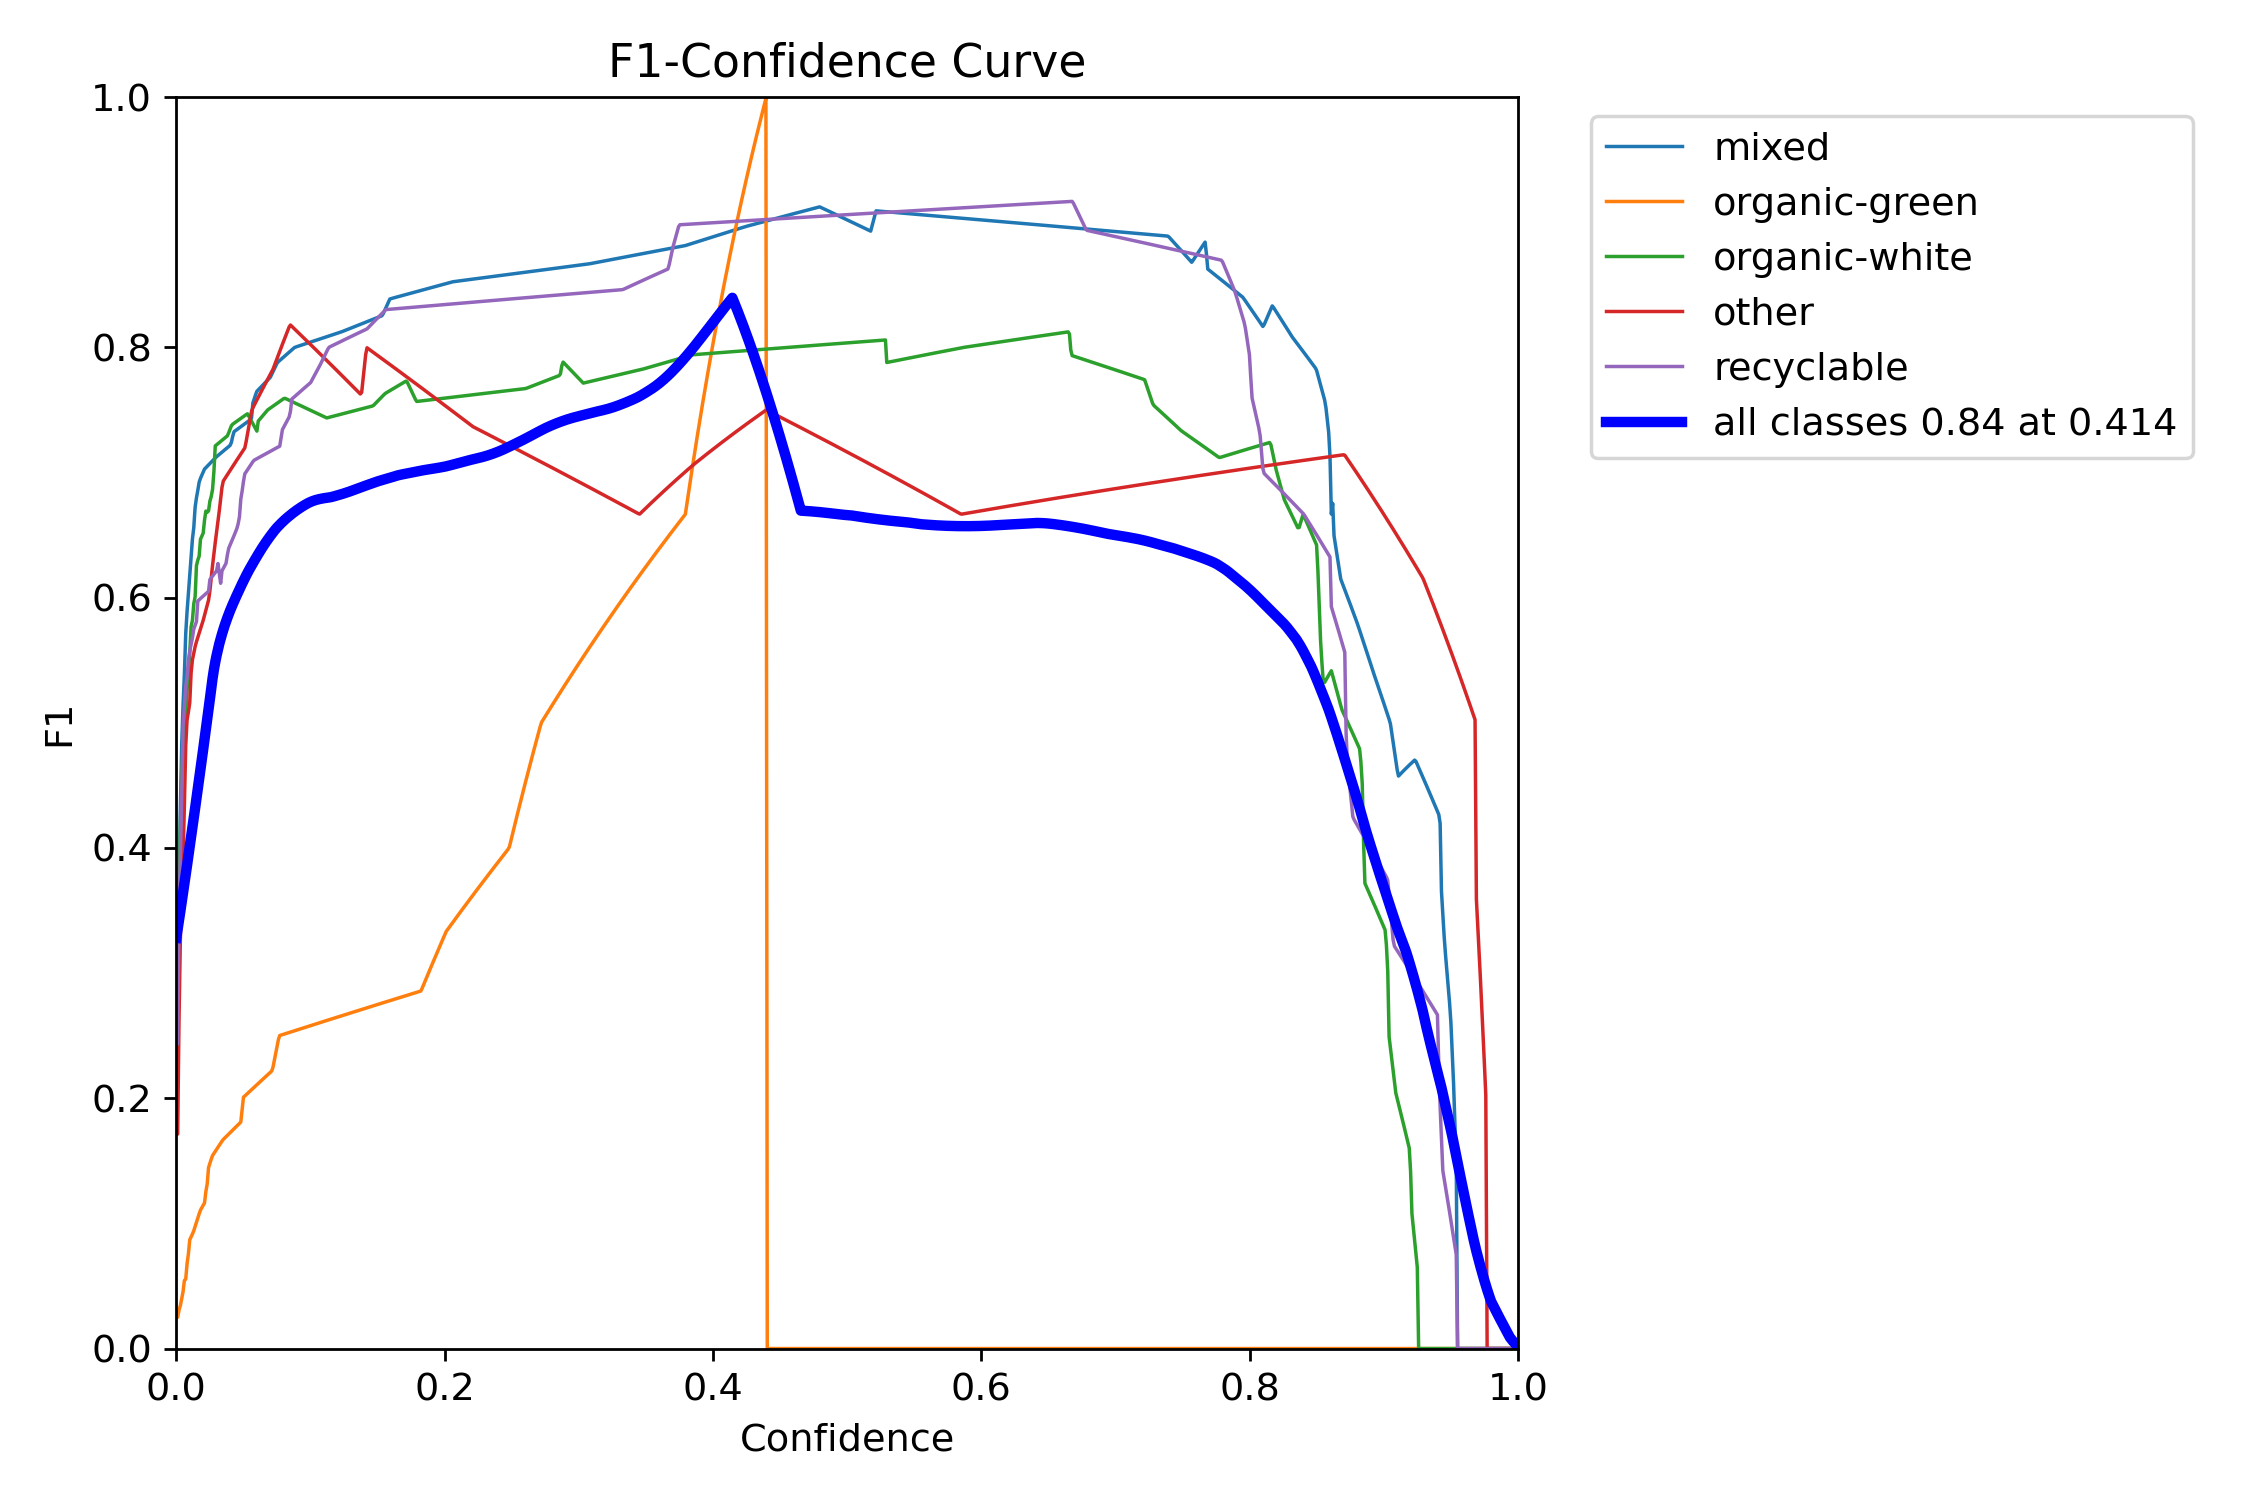

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


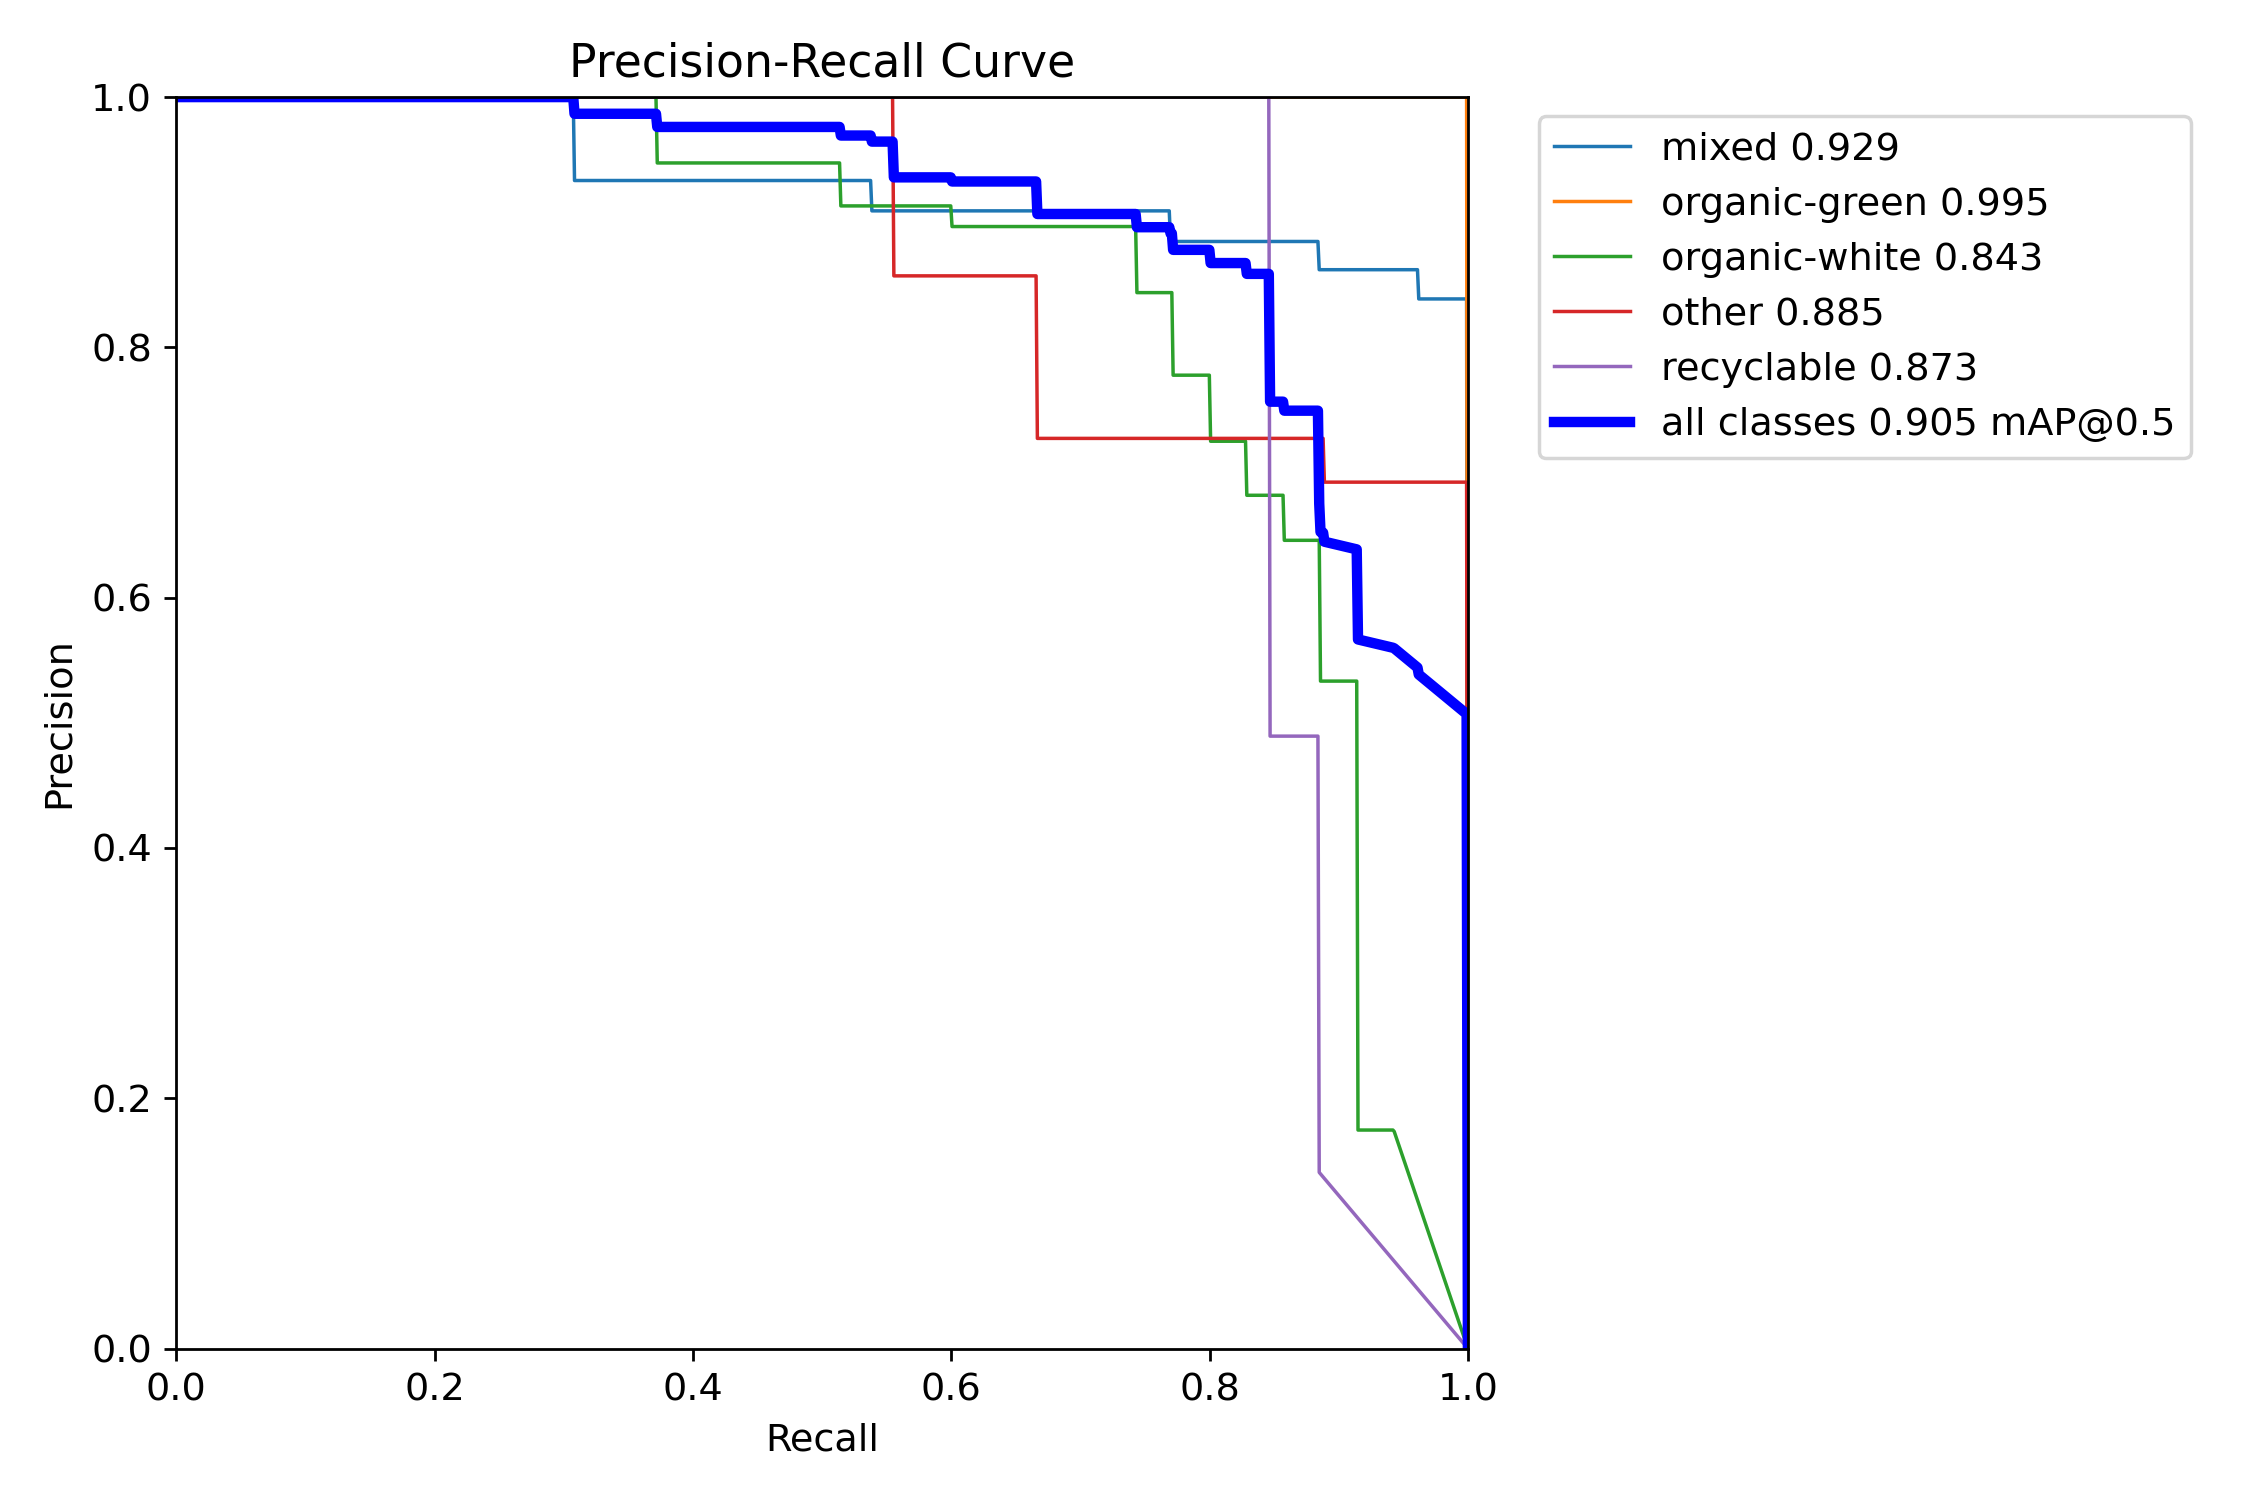

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content


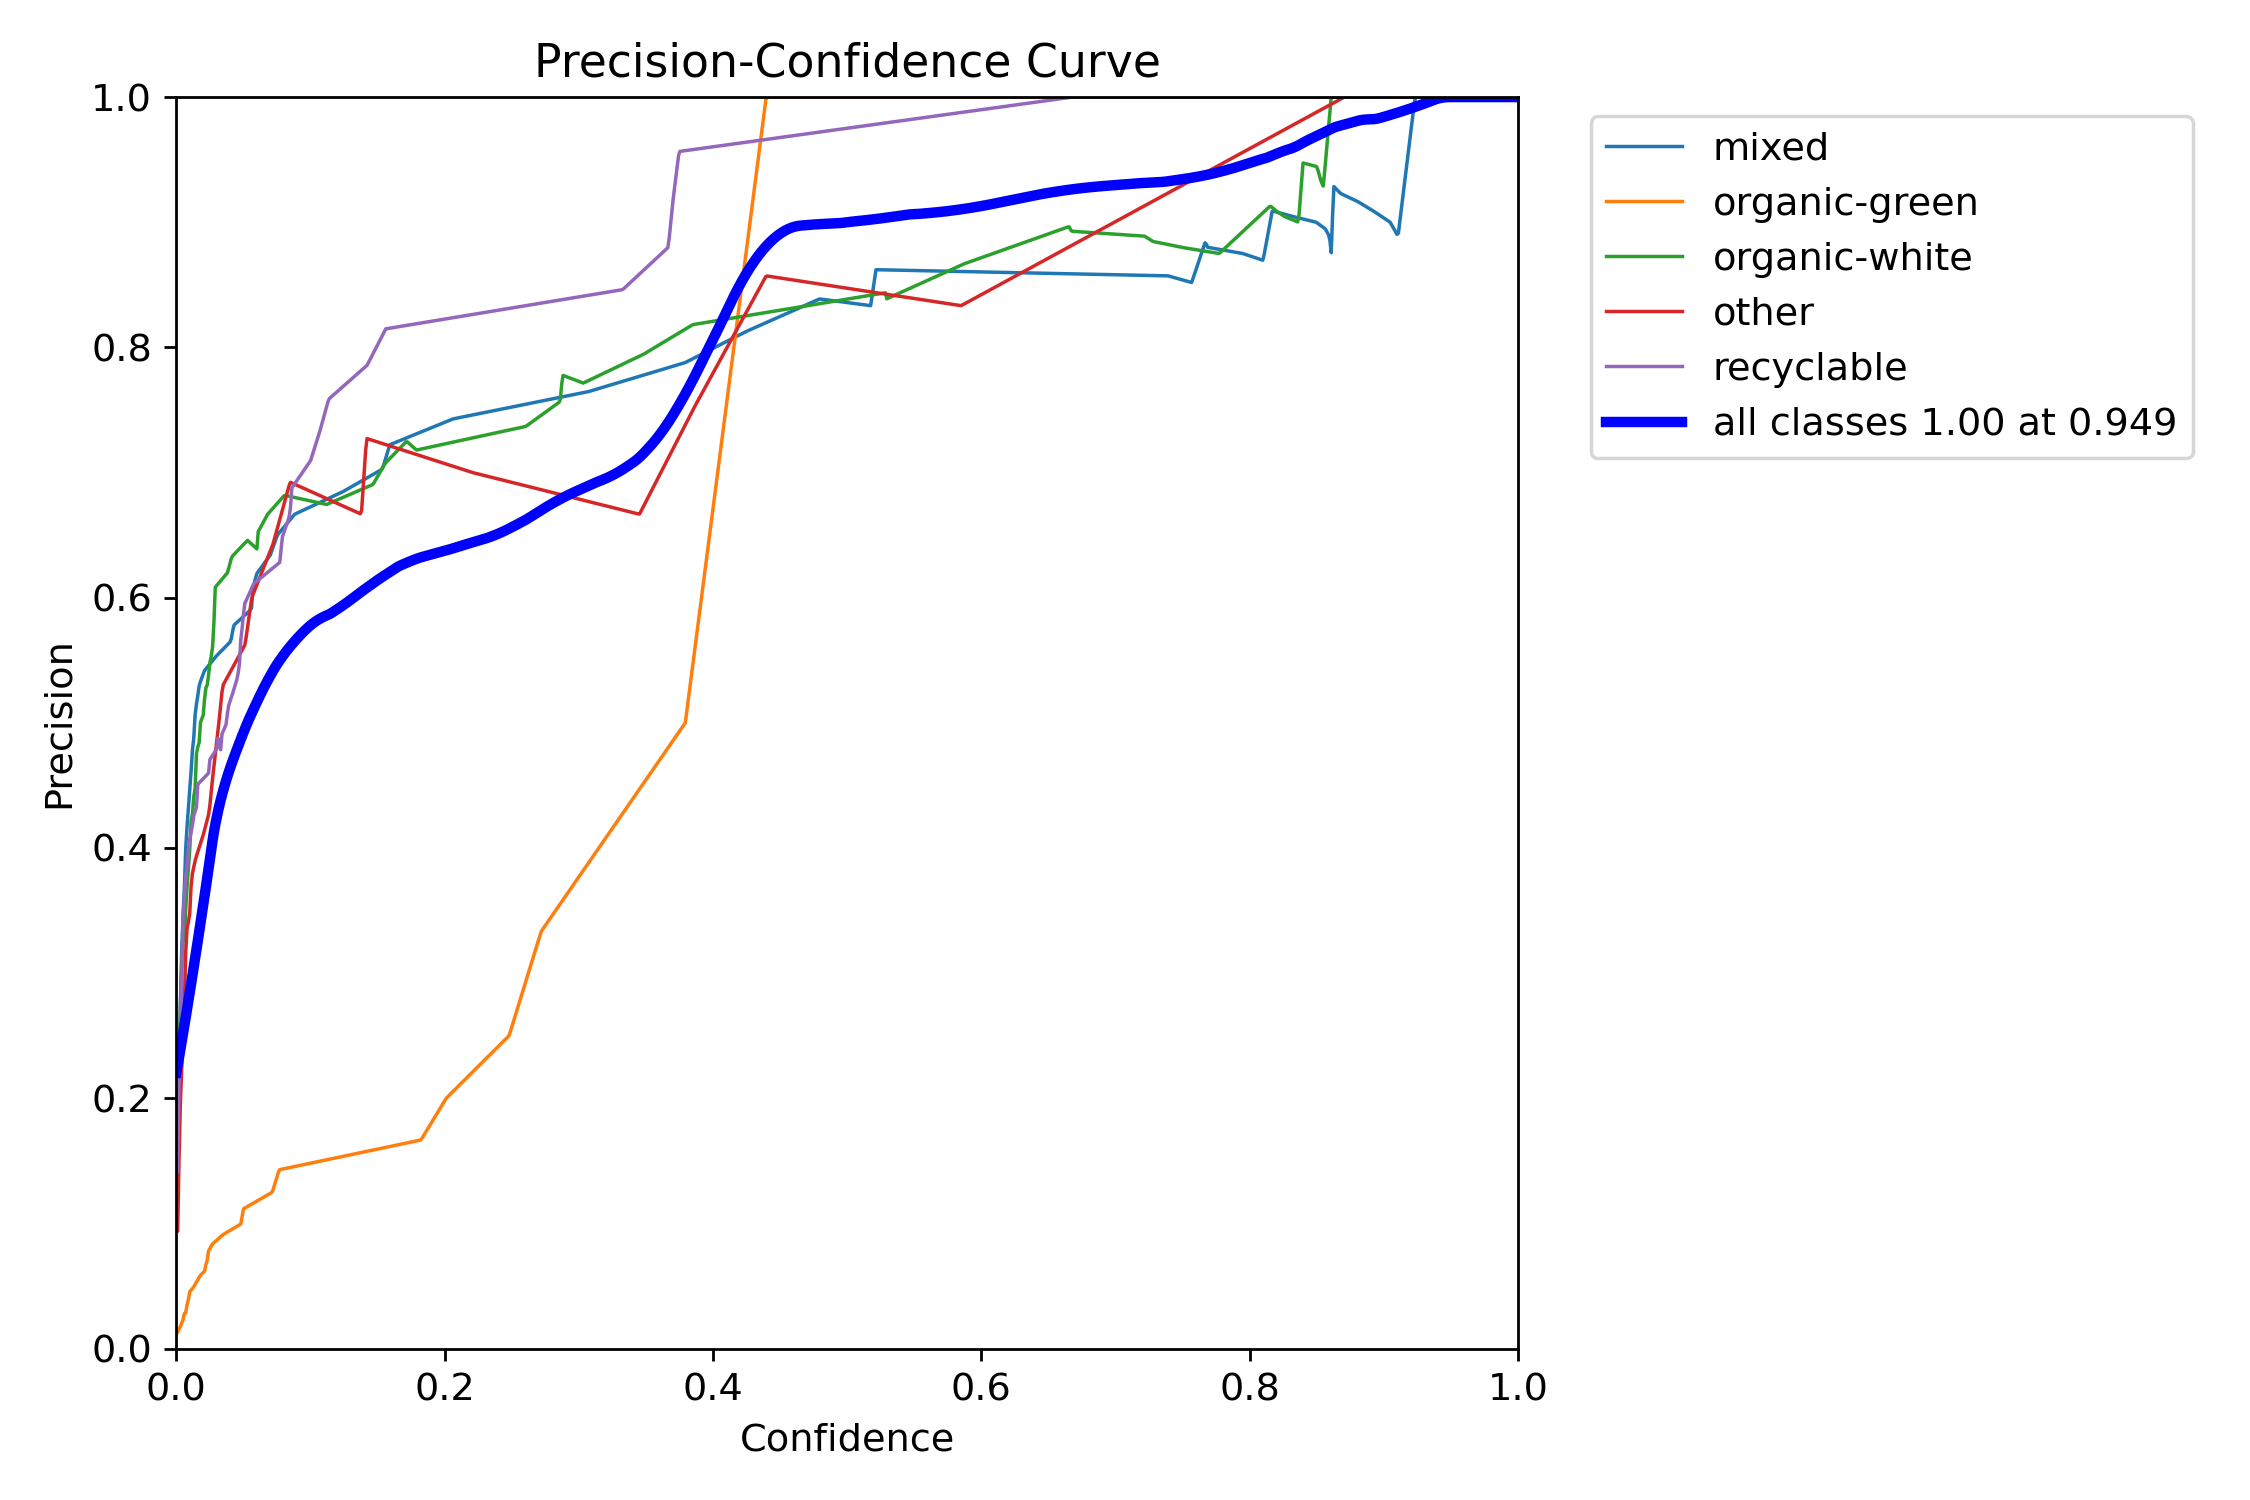

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/content


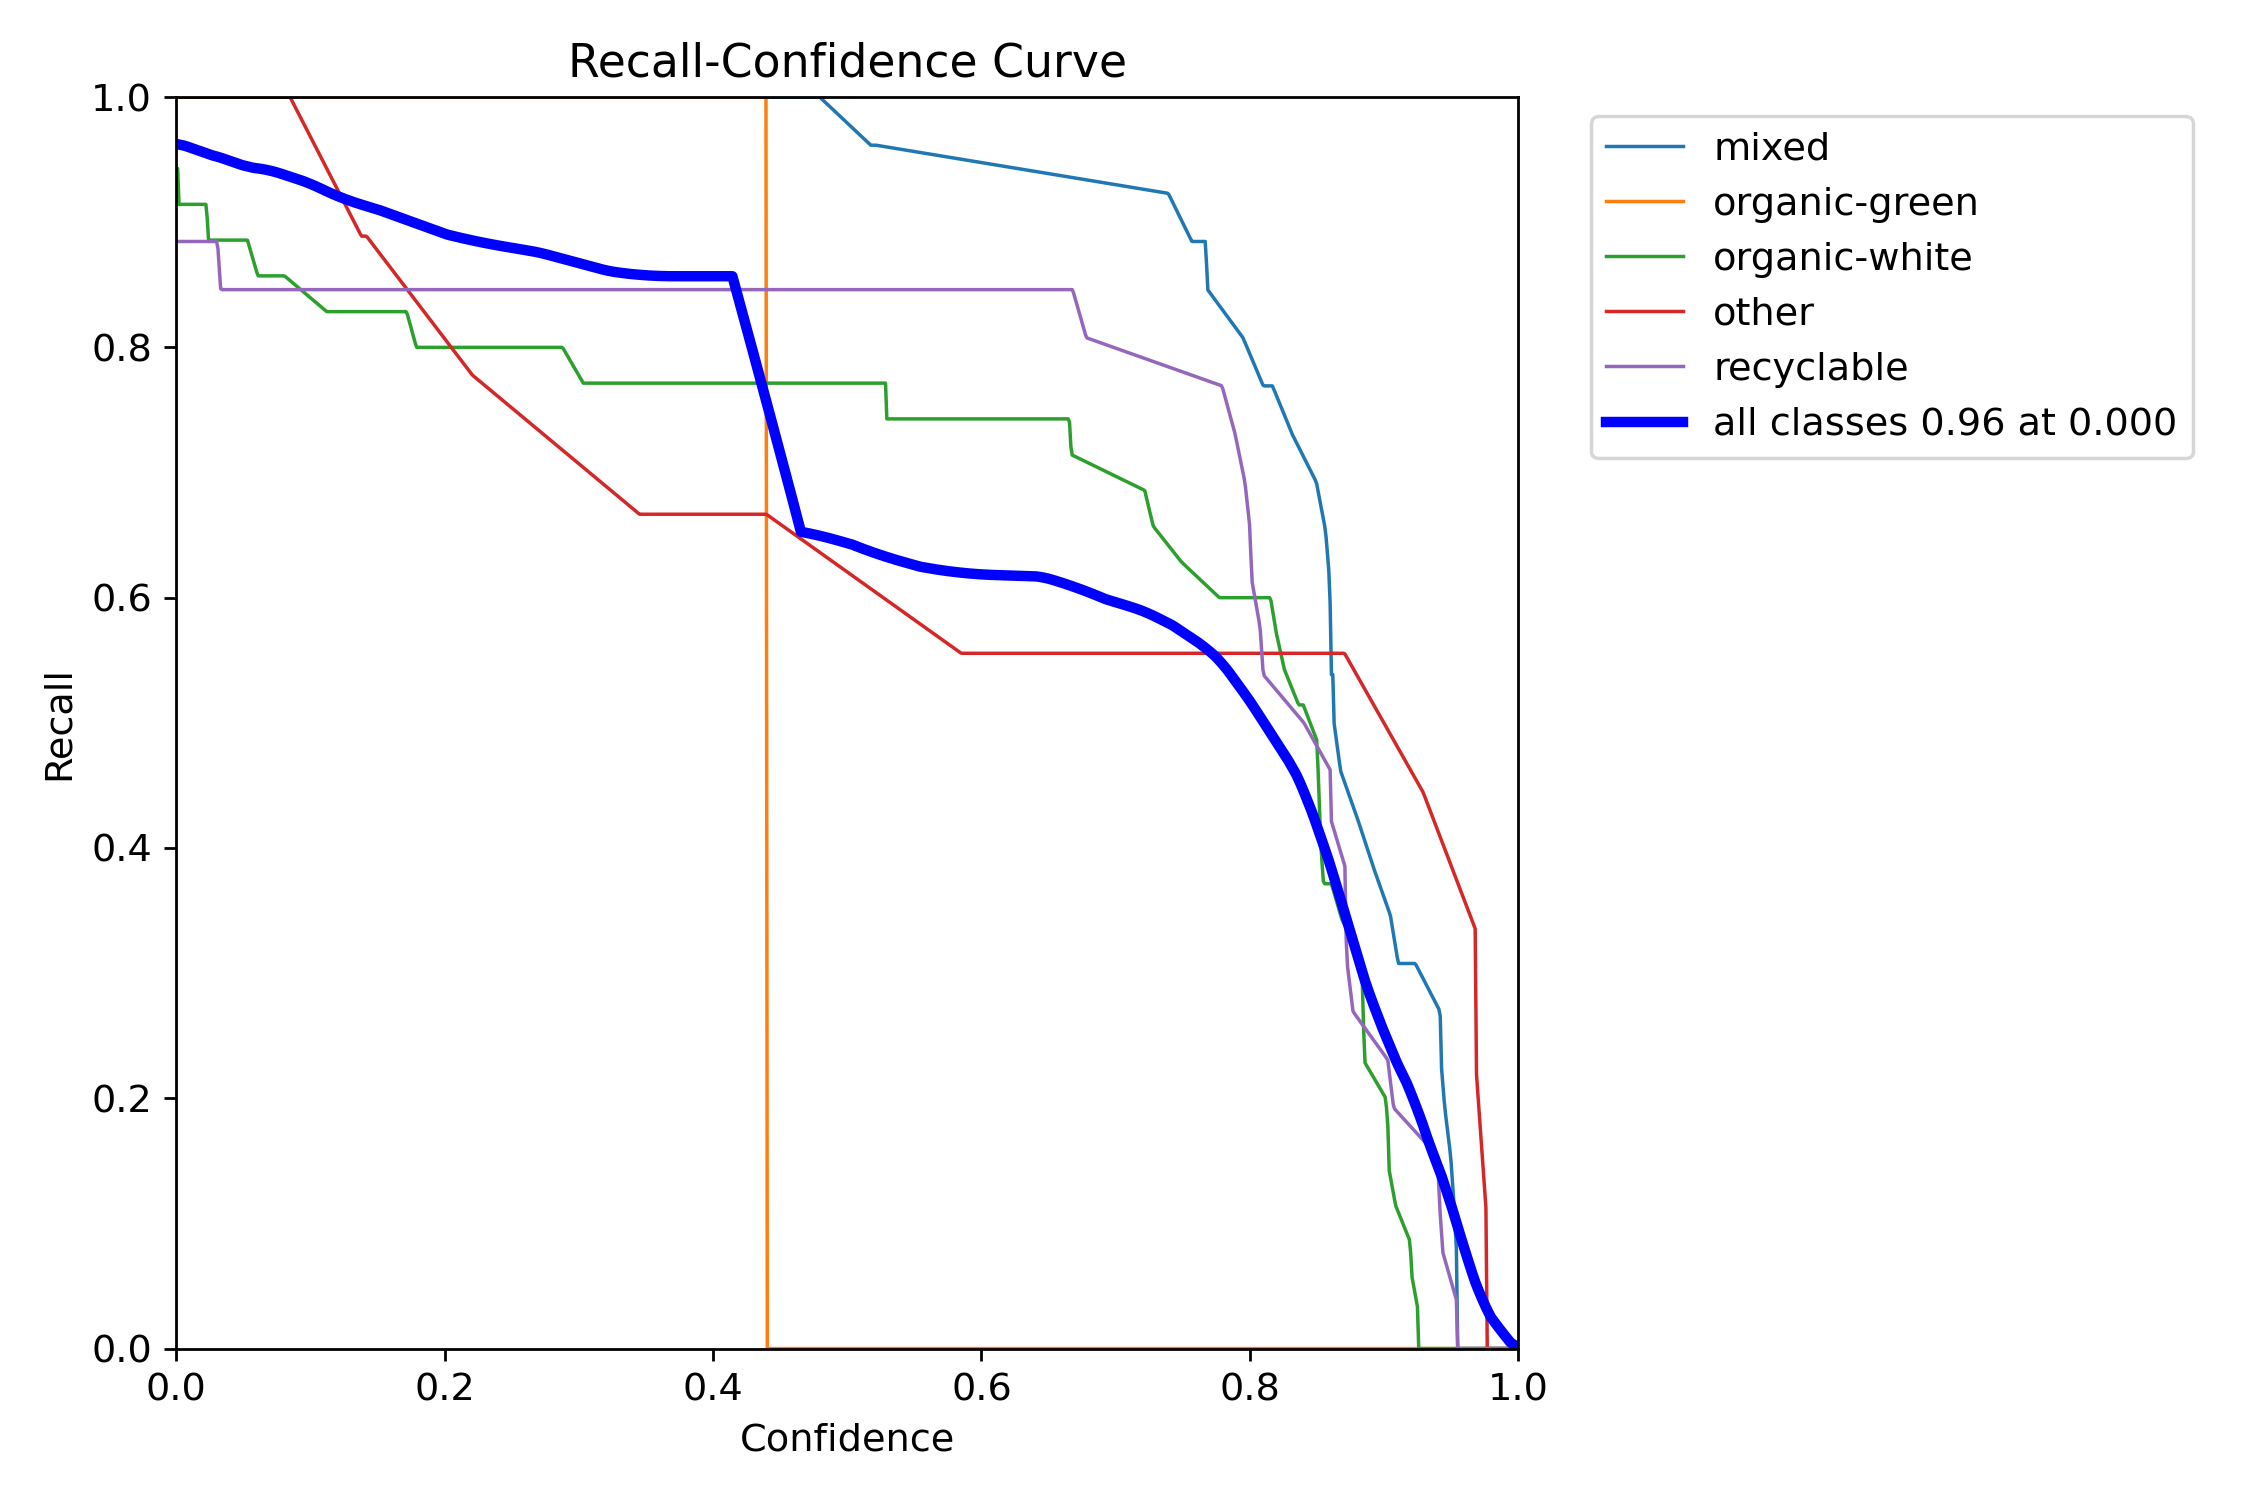

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

# Retrieving results from validation set

## Confusion matrix

/content


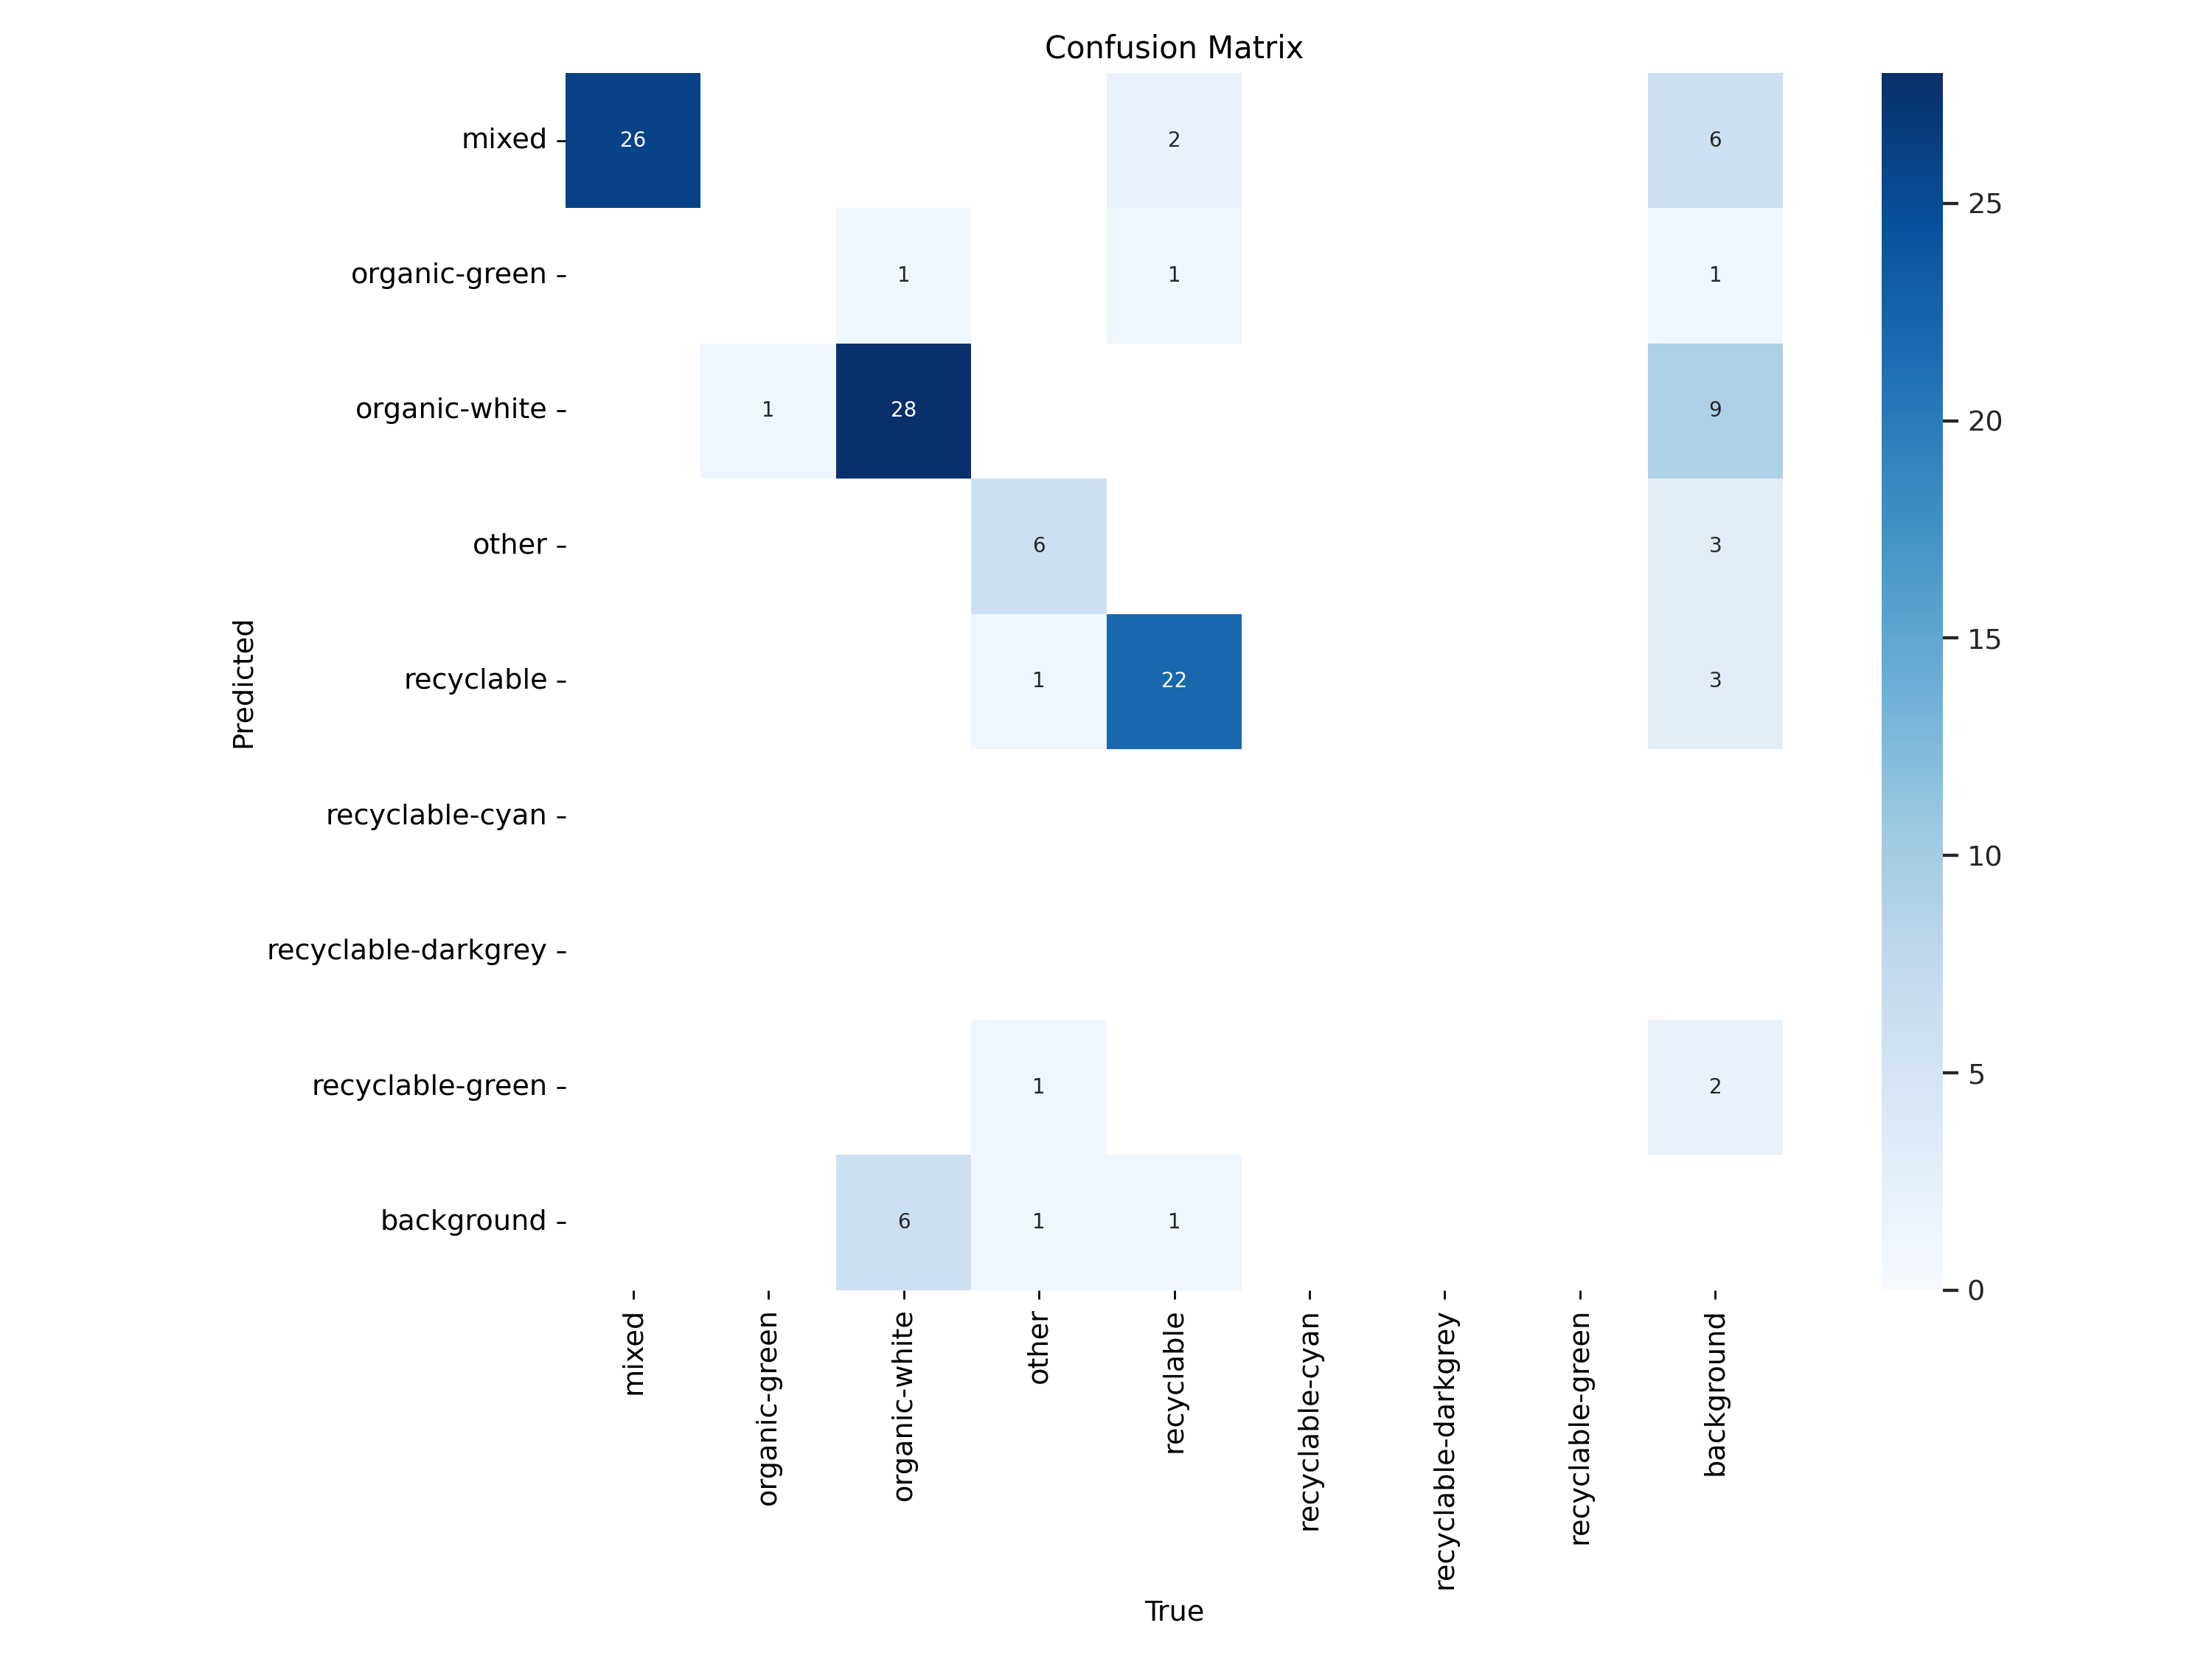

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

## Graphs from validation results (F1-Score, Loss, Precision, Recall)

/content


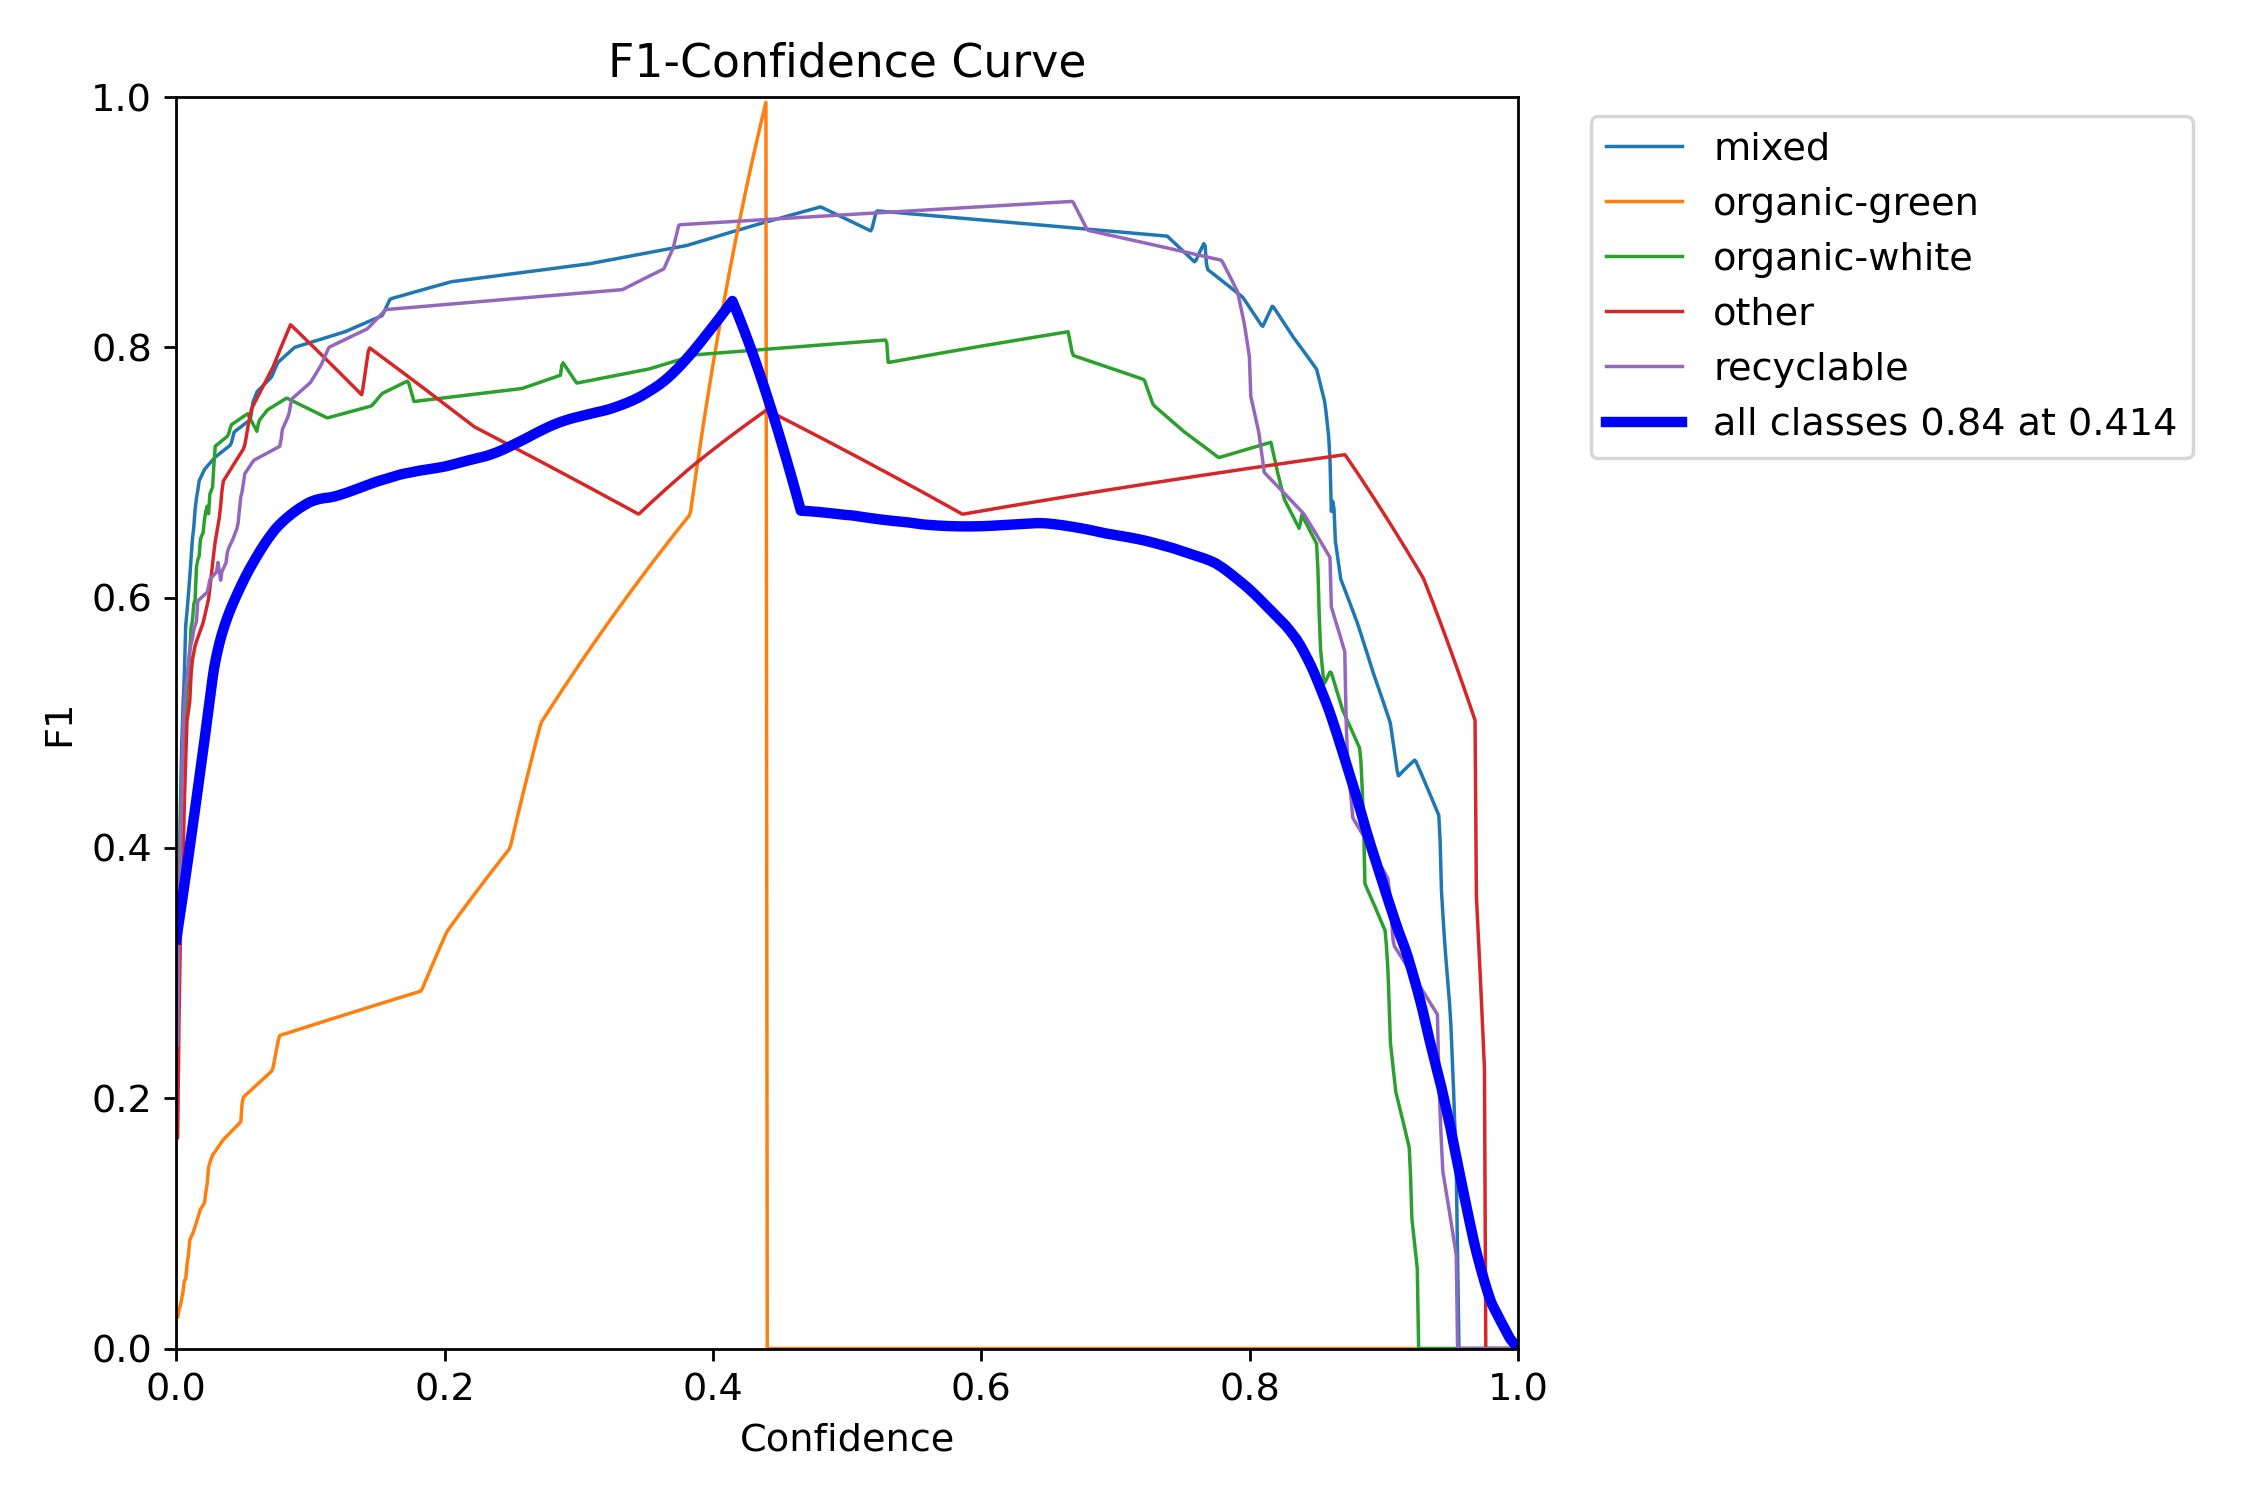

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/F1_curve.png', width=600)

/content


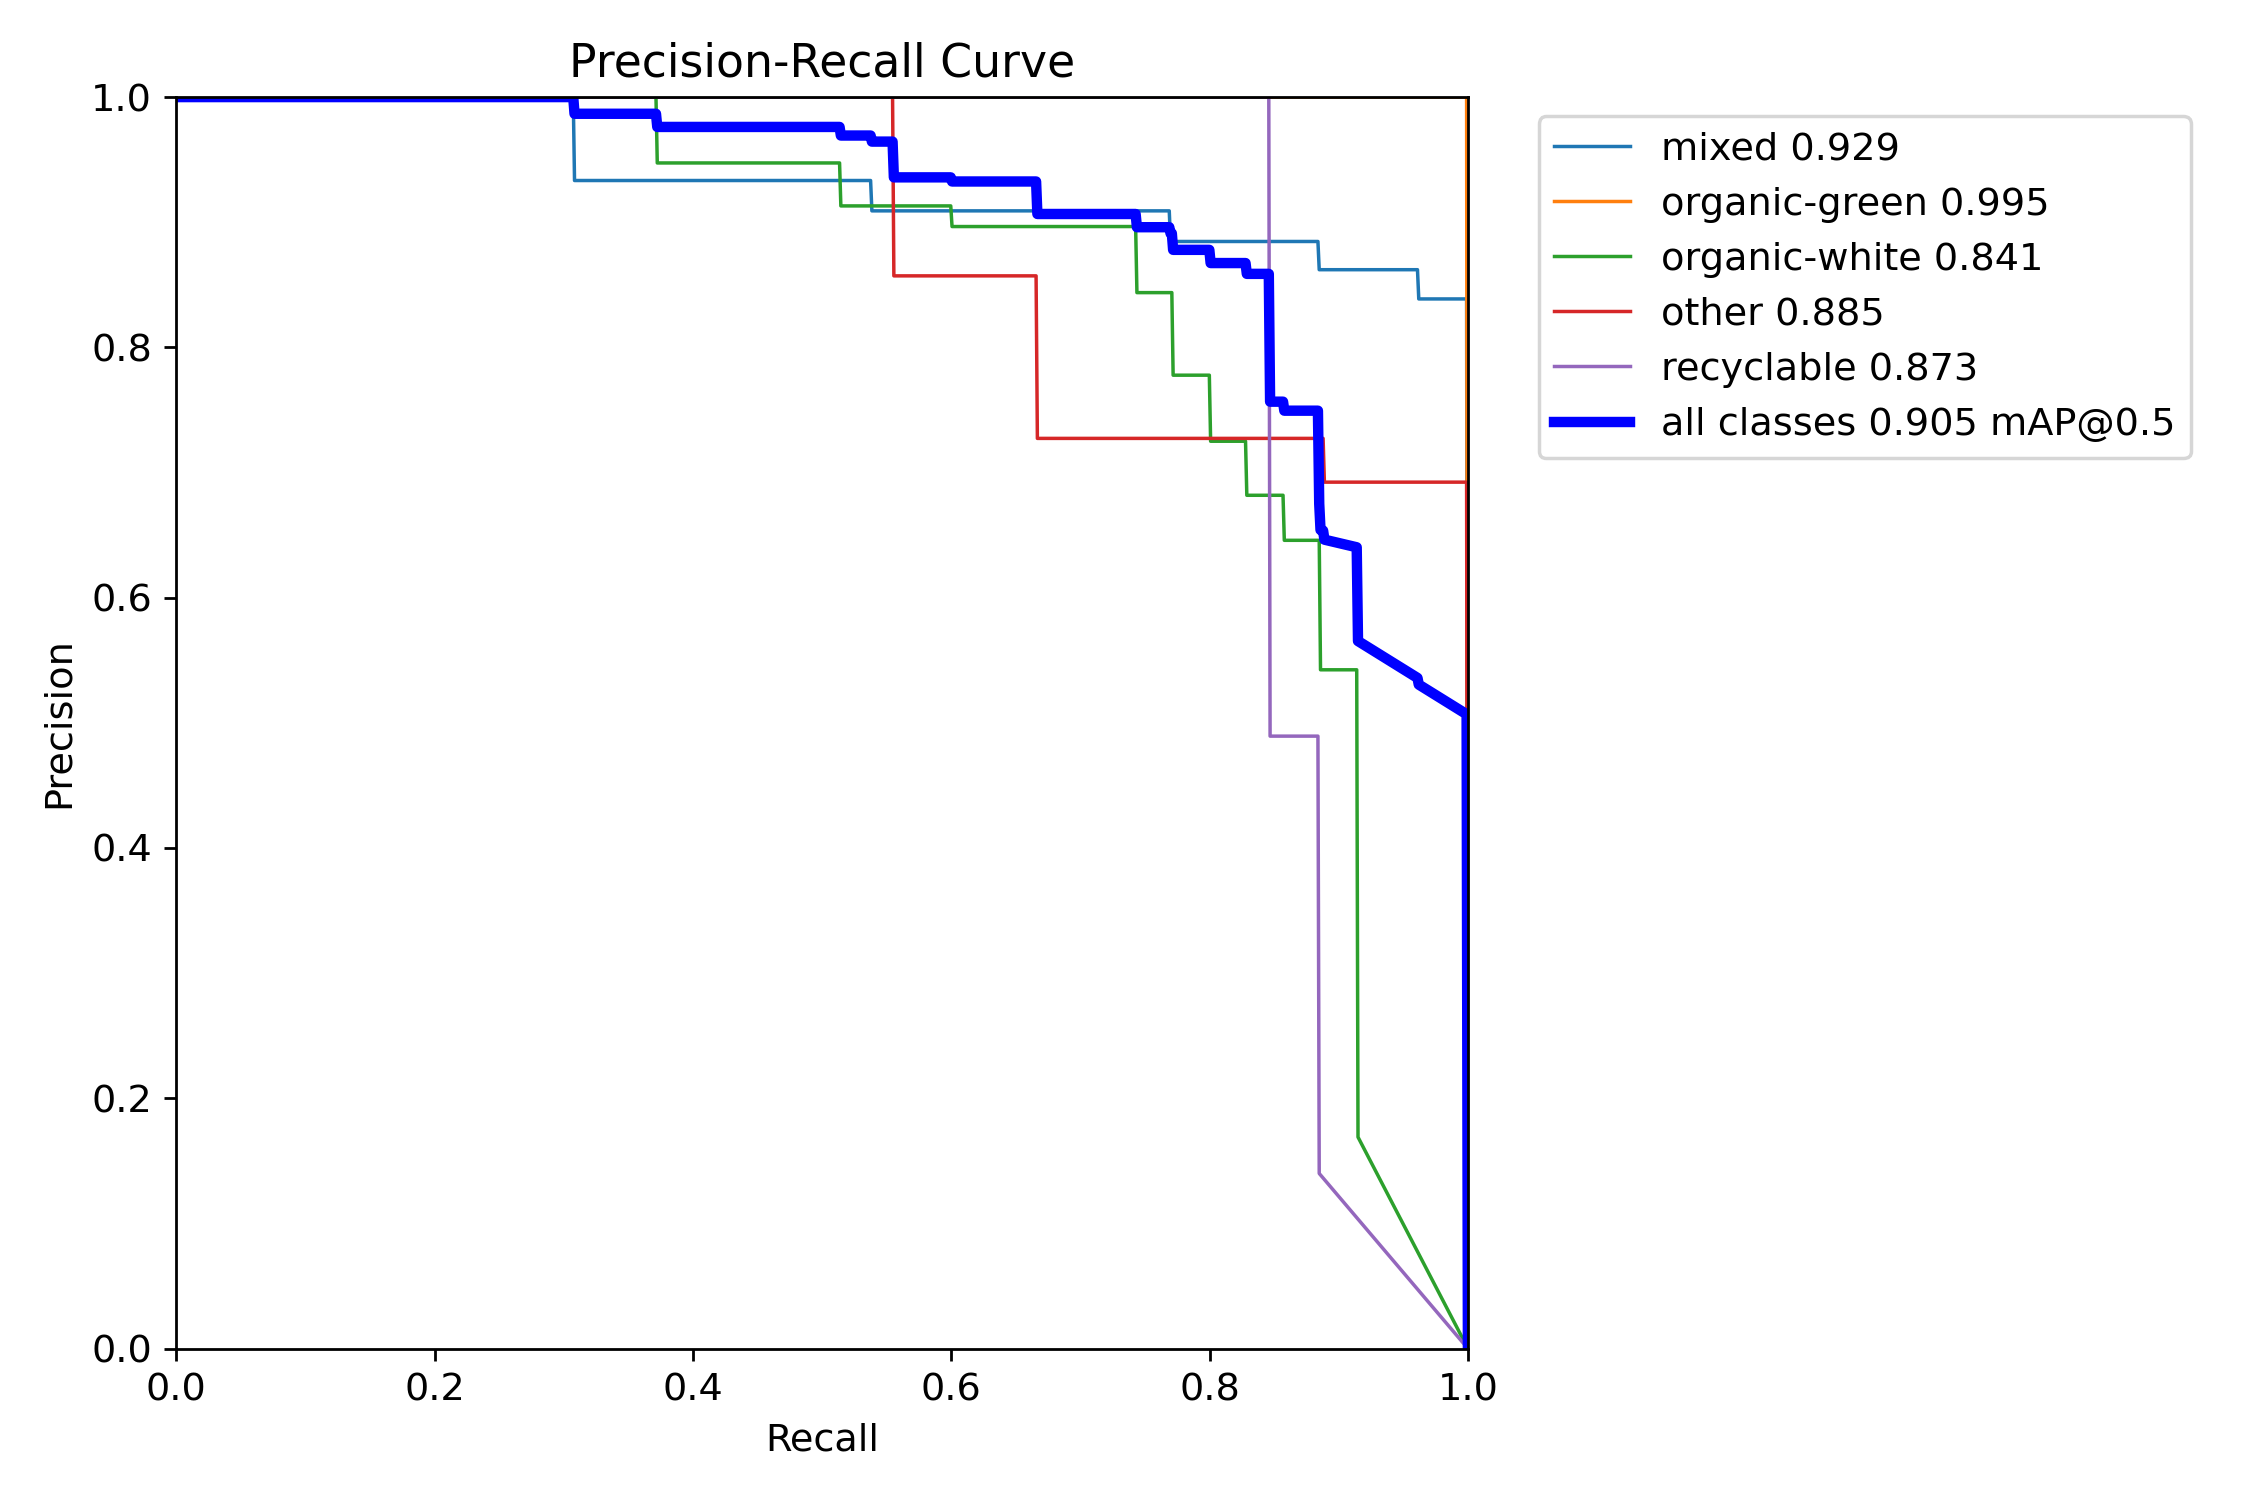

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

/content


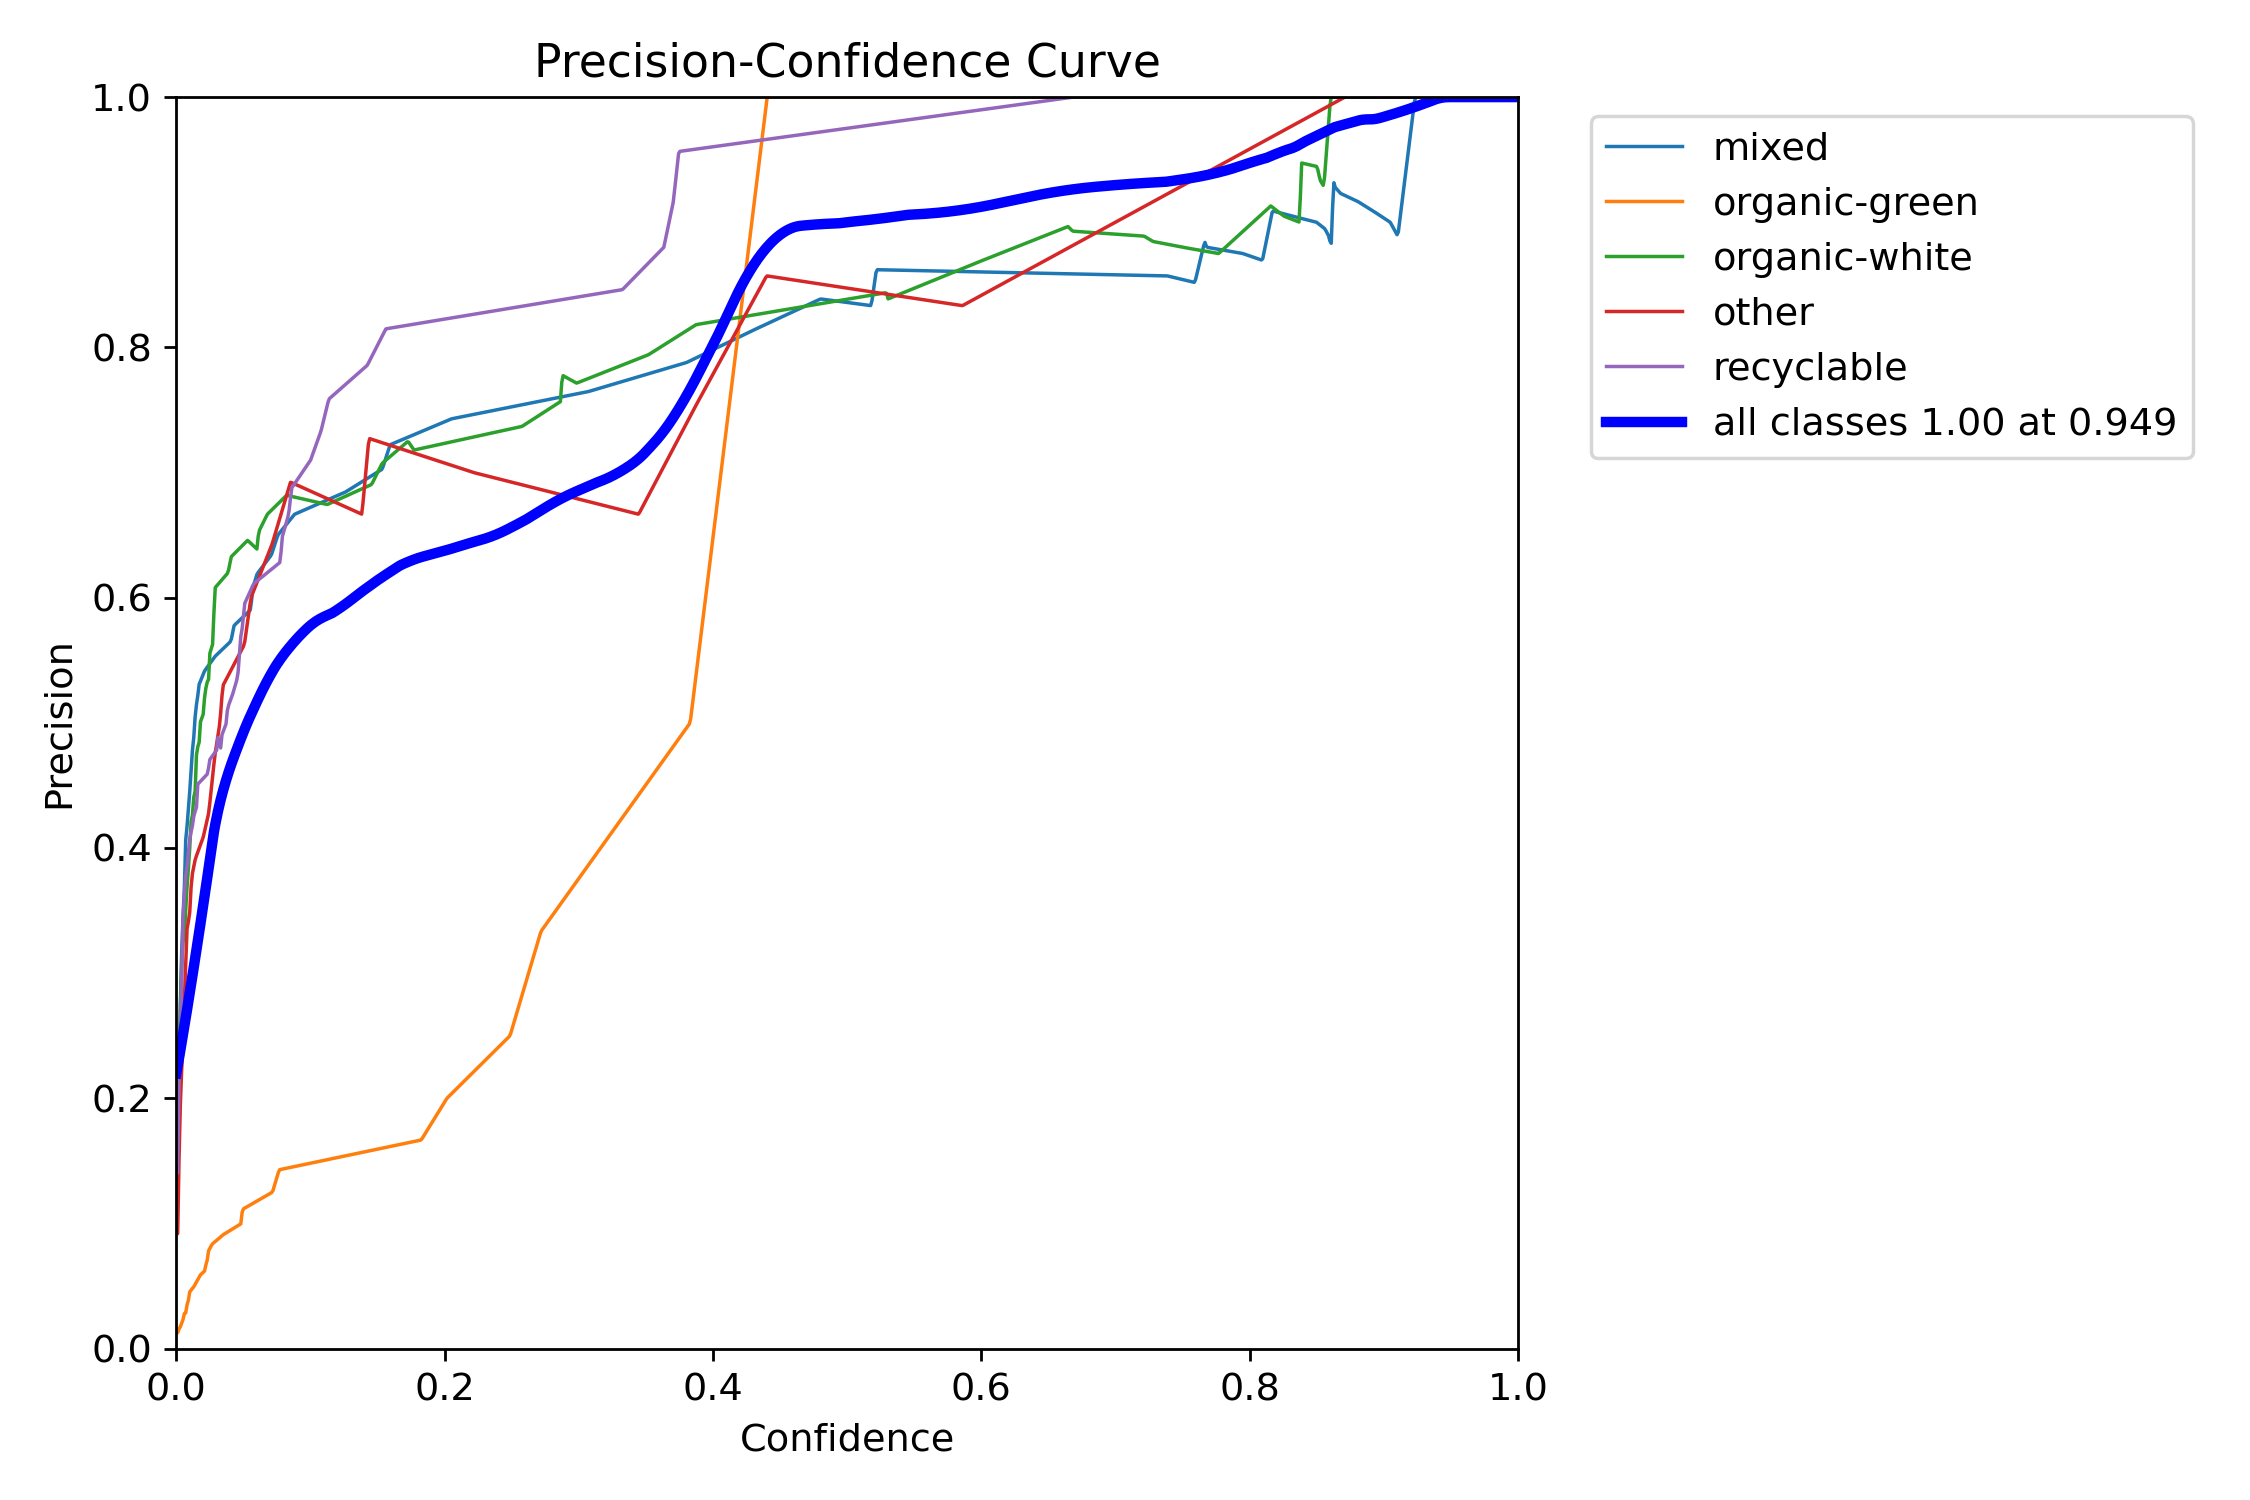

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/P_curve.png', width=600)

/content


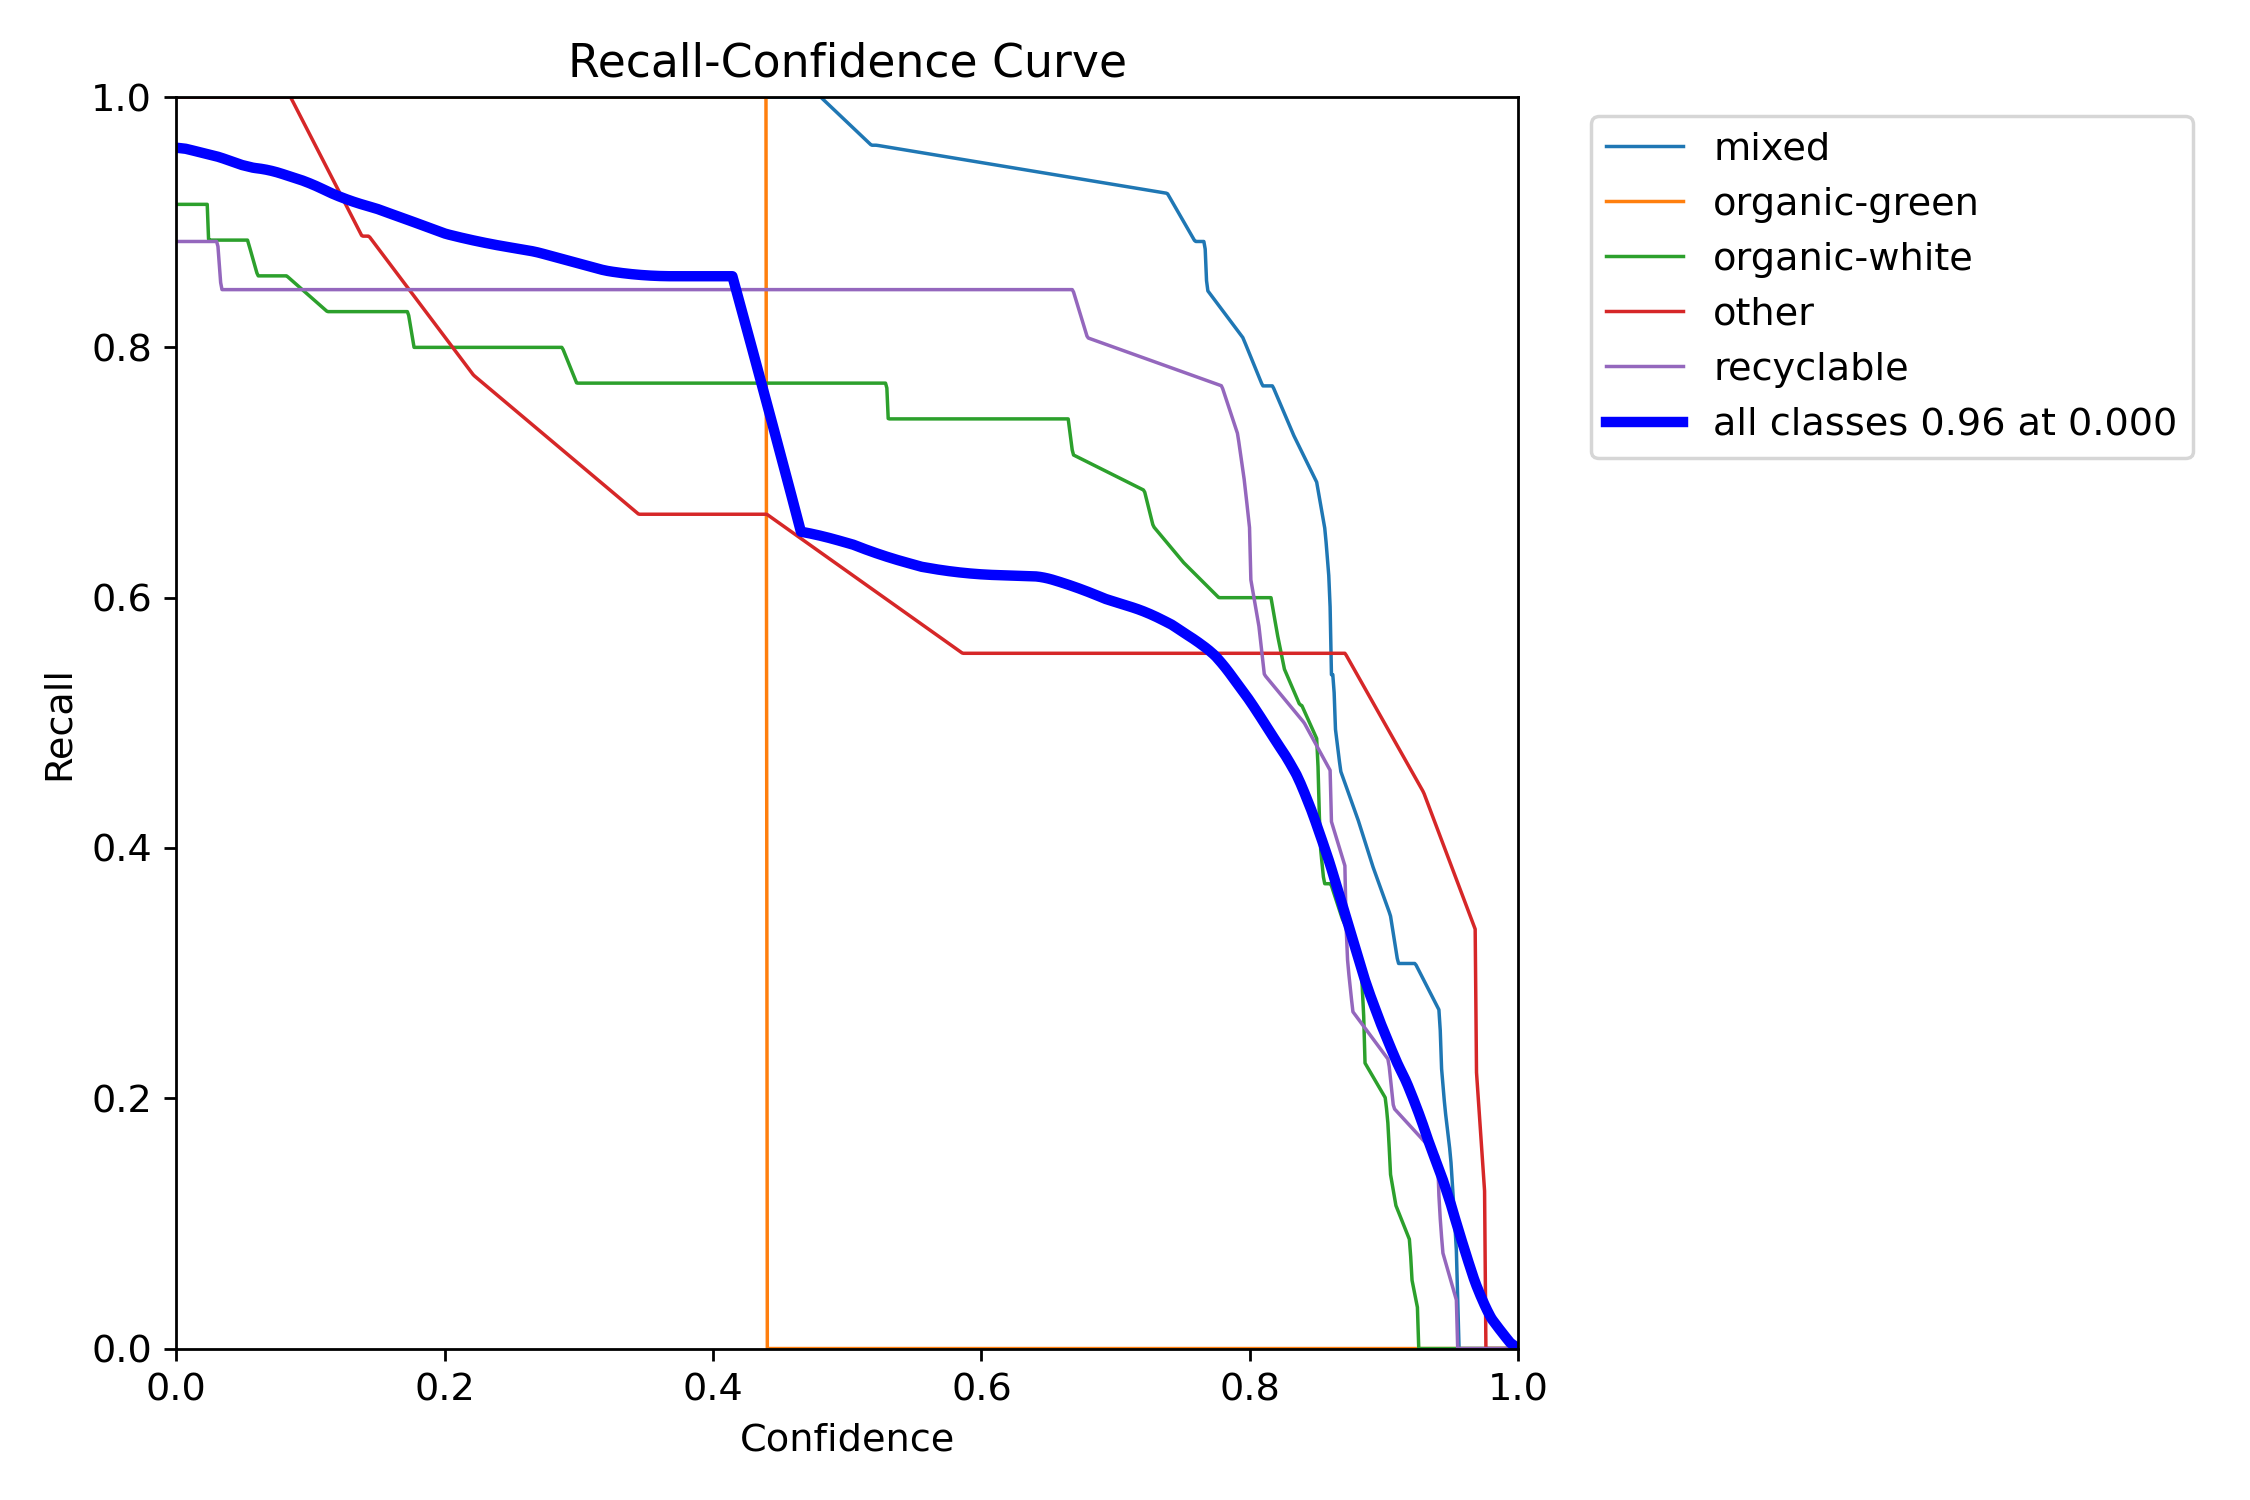

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/R_curve.png', width=600)

# Retrieving results from test set

## Confusion matrix

/content


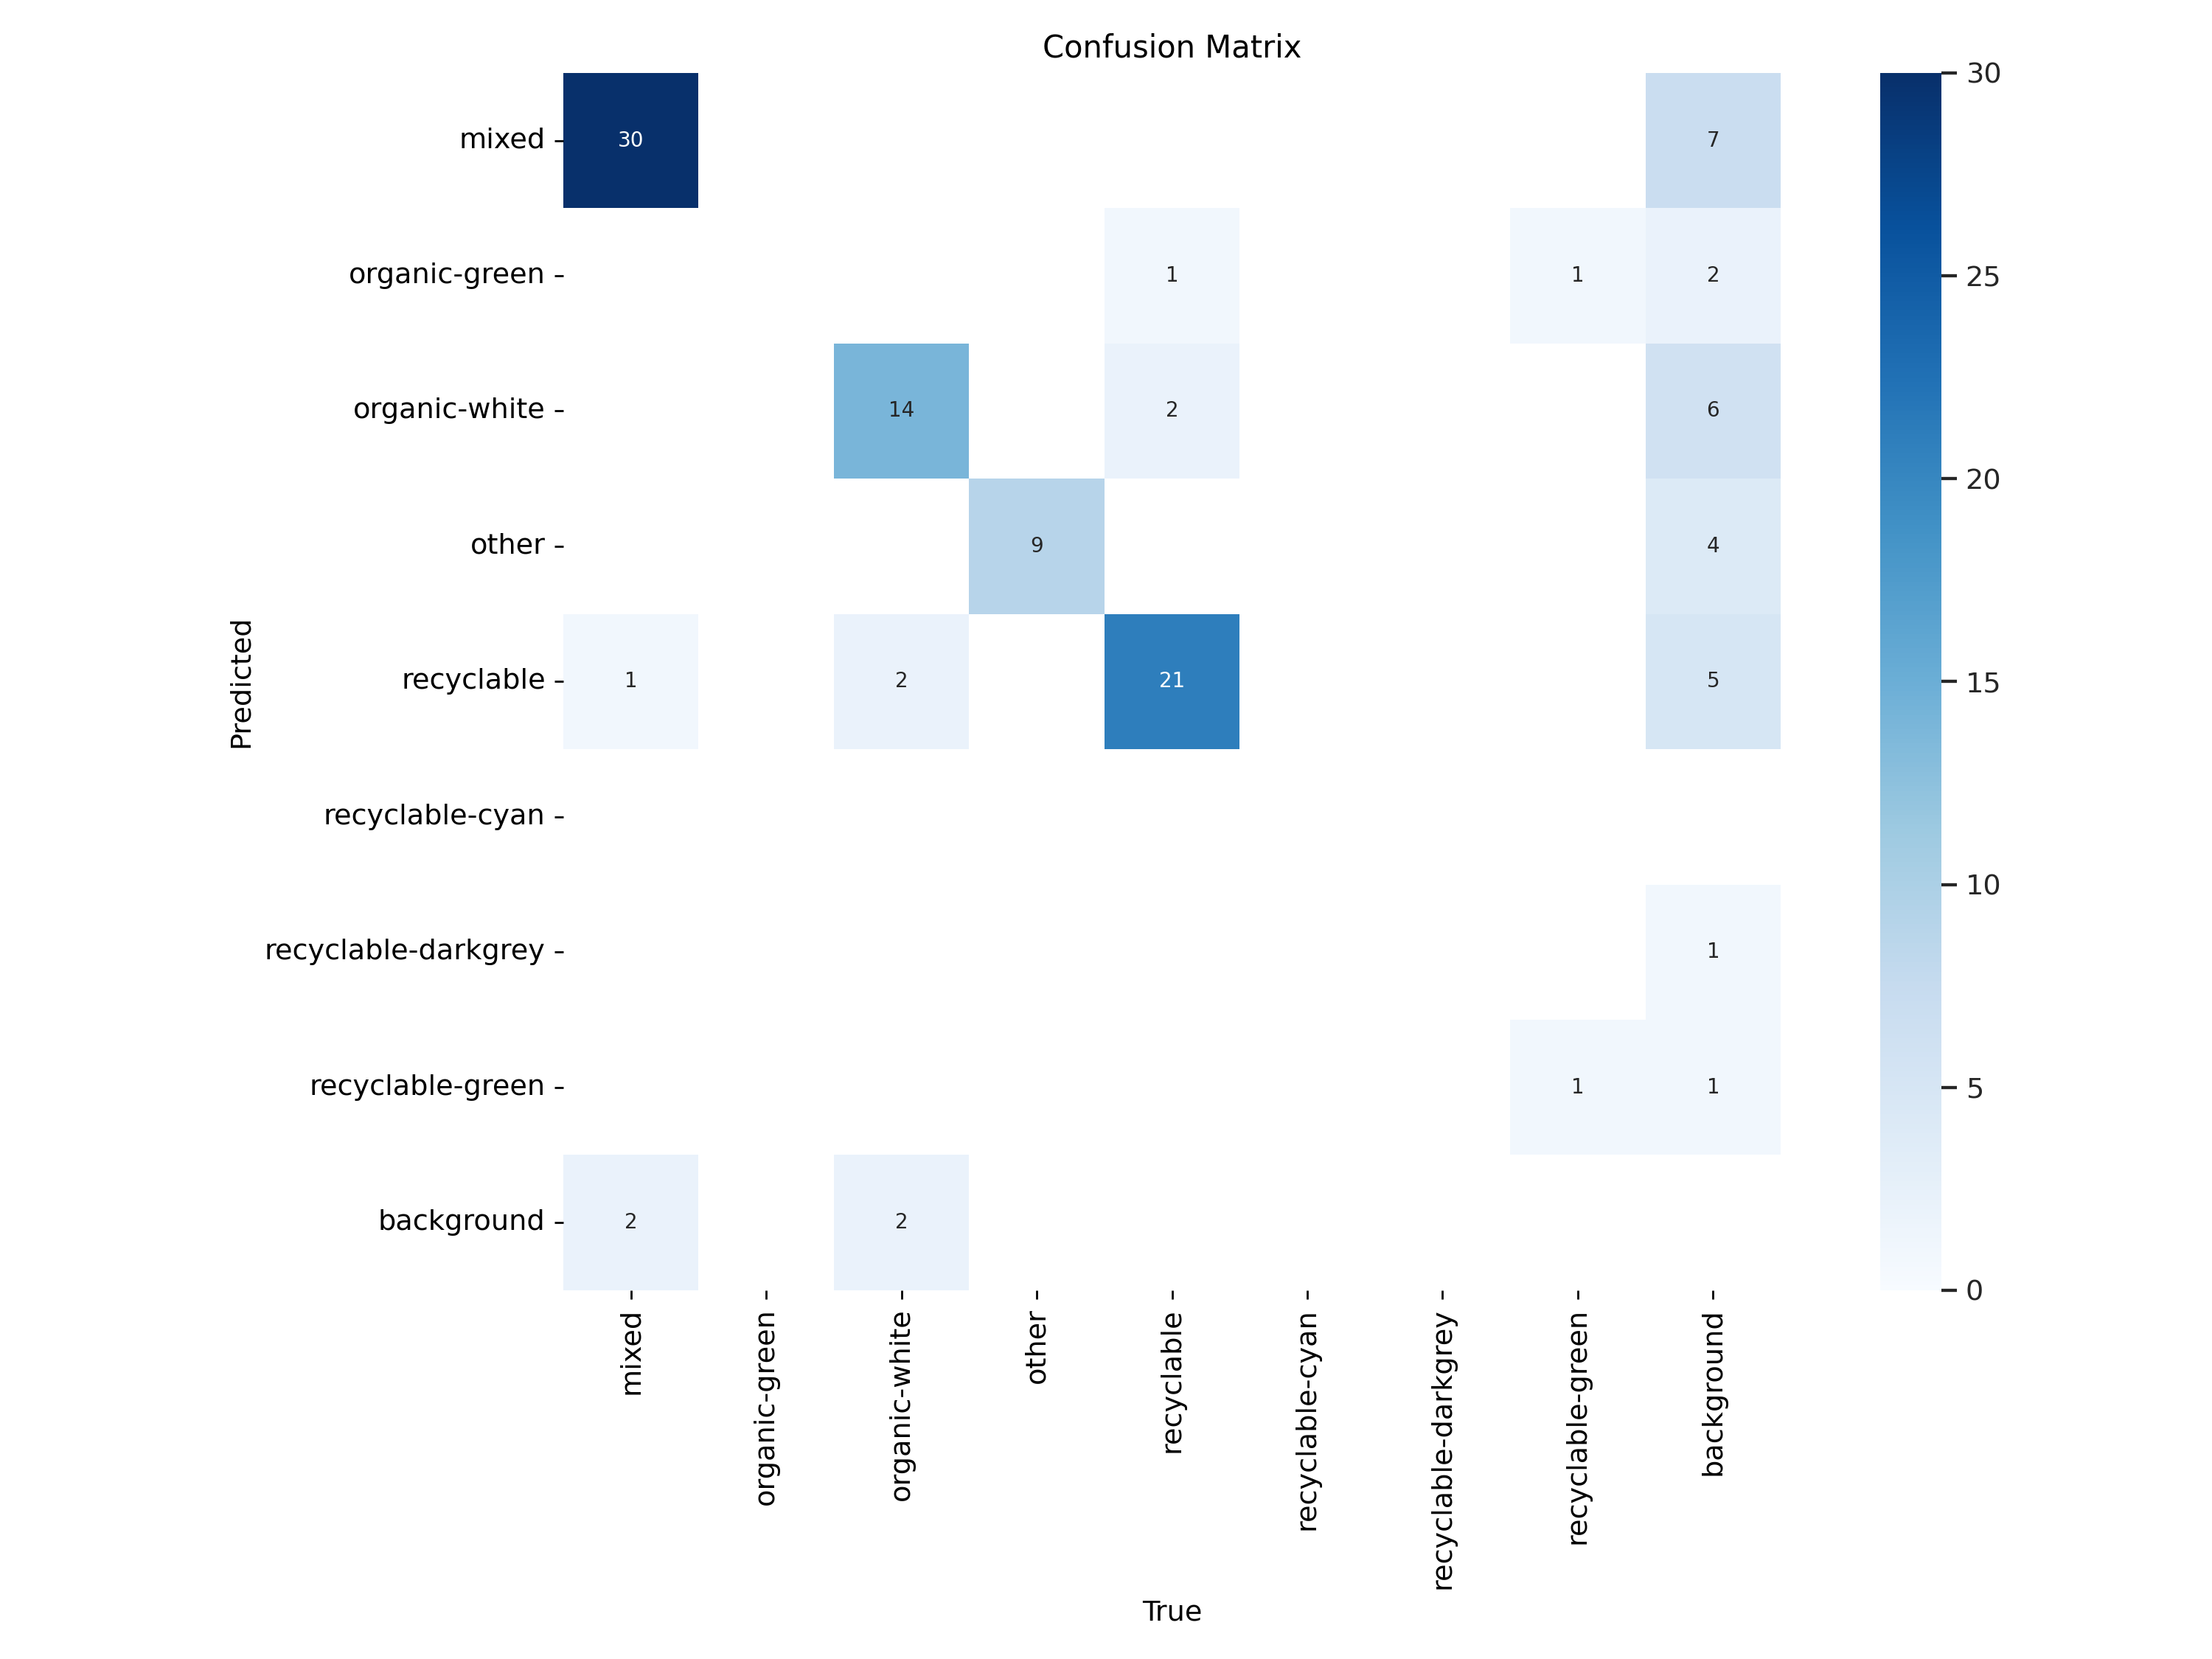

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/confusion_matrix.png', width=600)

## Graphs from validation results (F1-Score, Loss, Precision, Recall)

/content


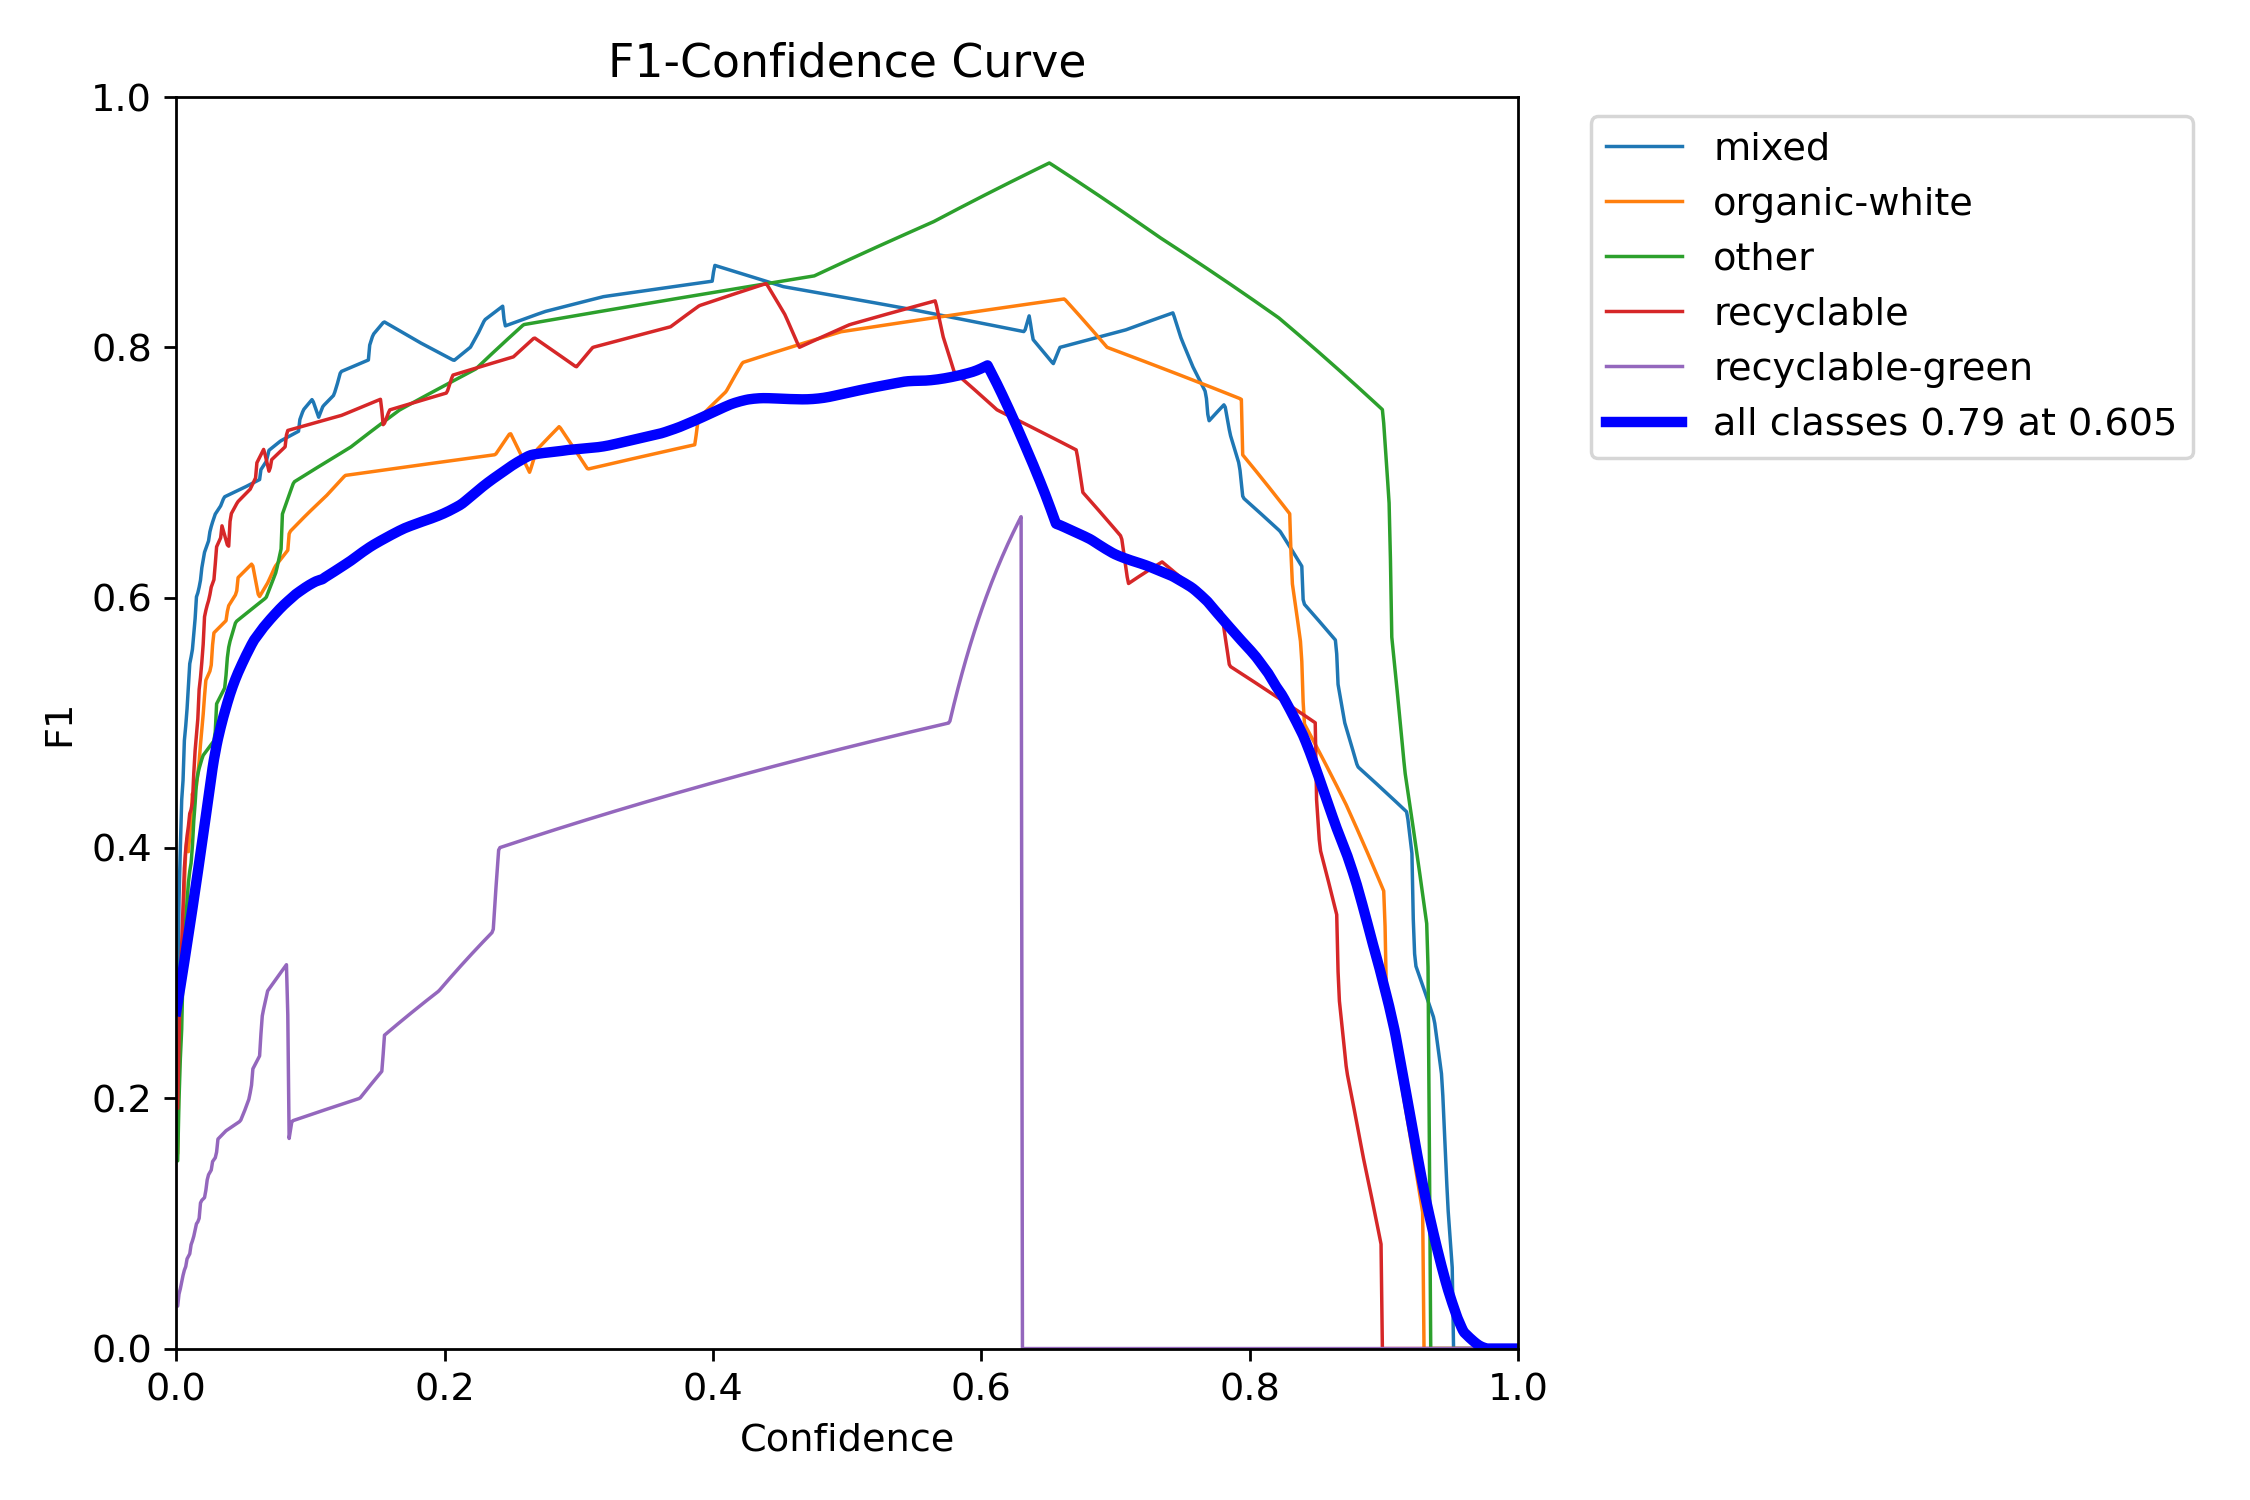

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/F1_curve.png', width=600)

/content


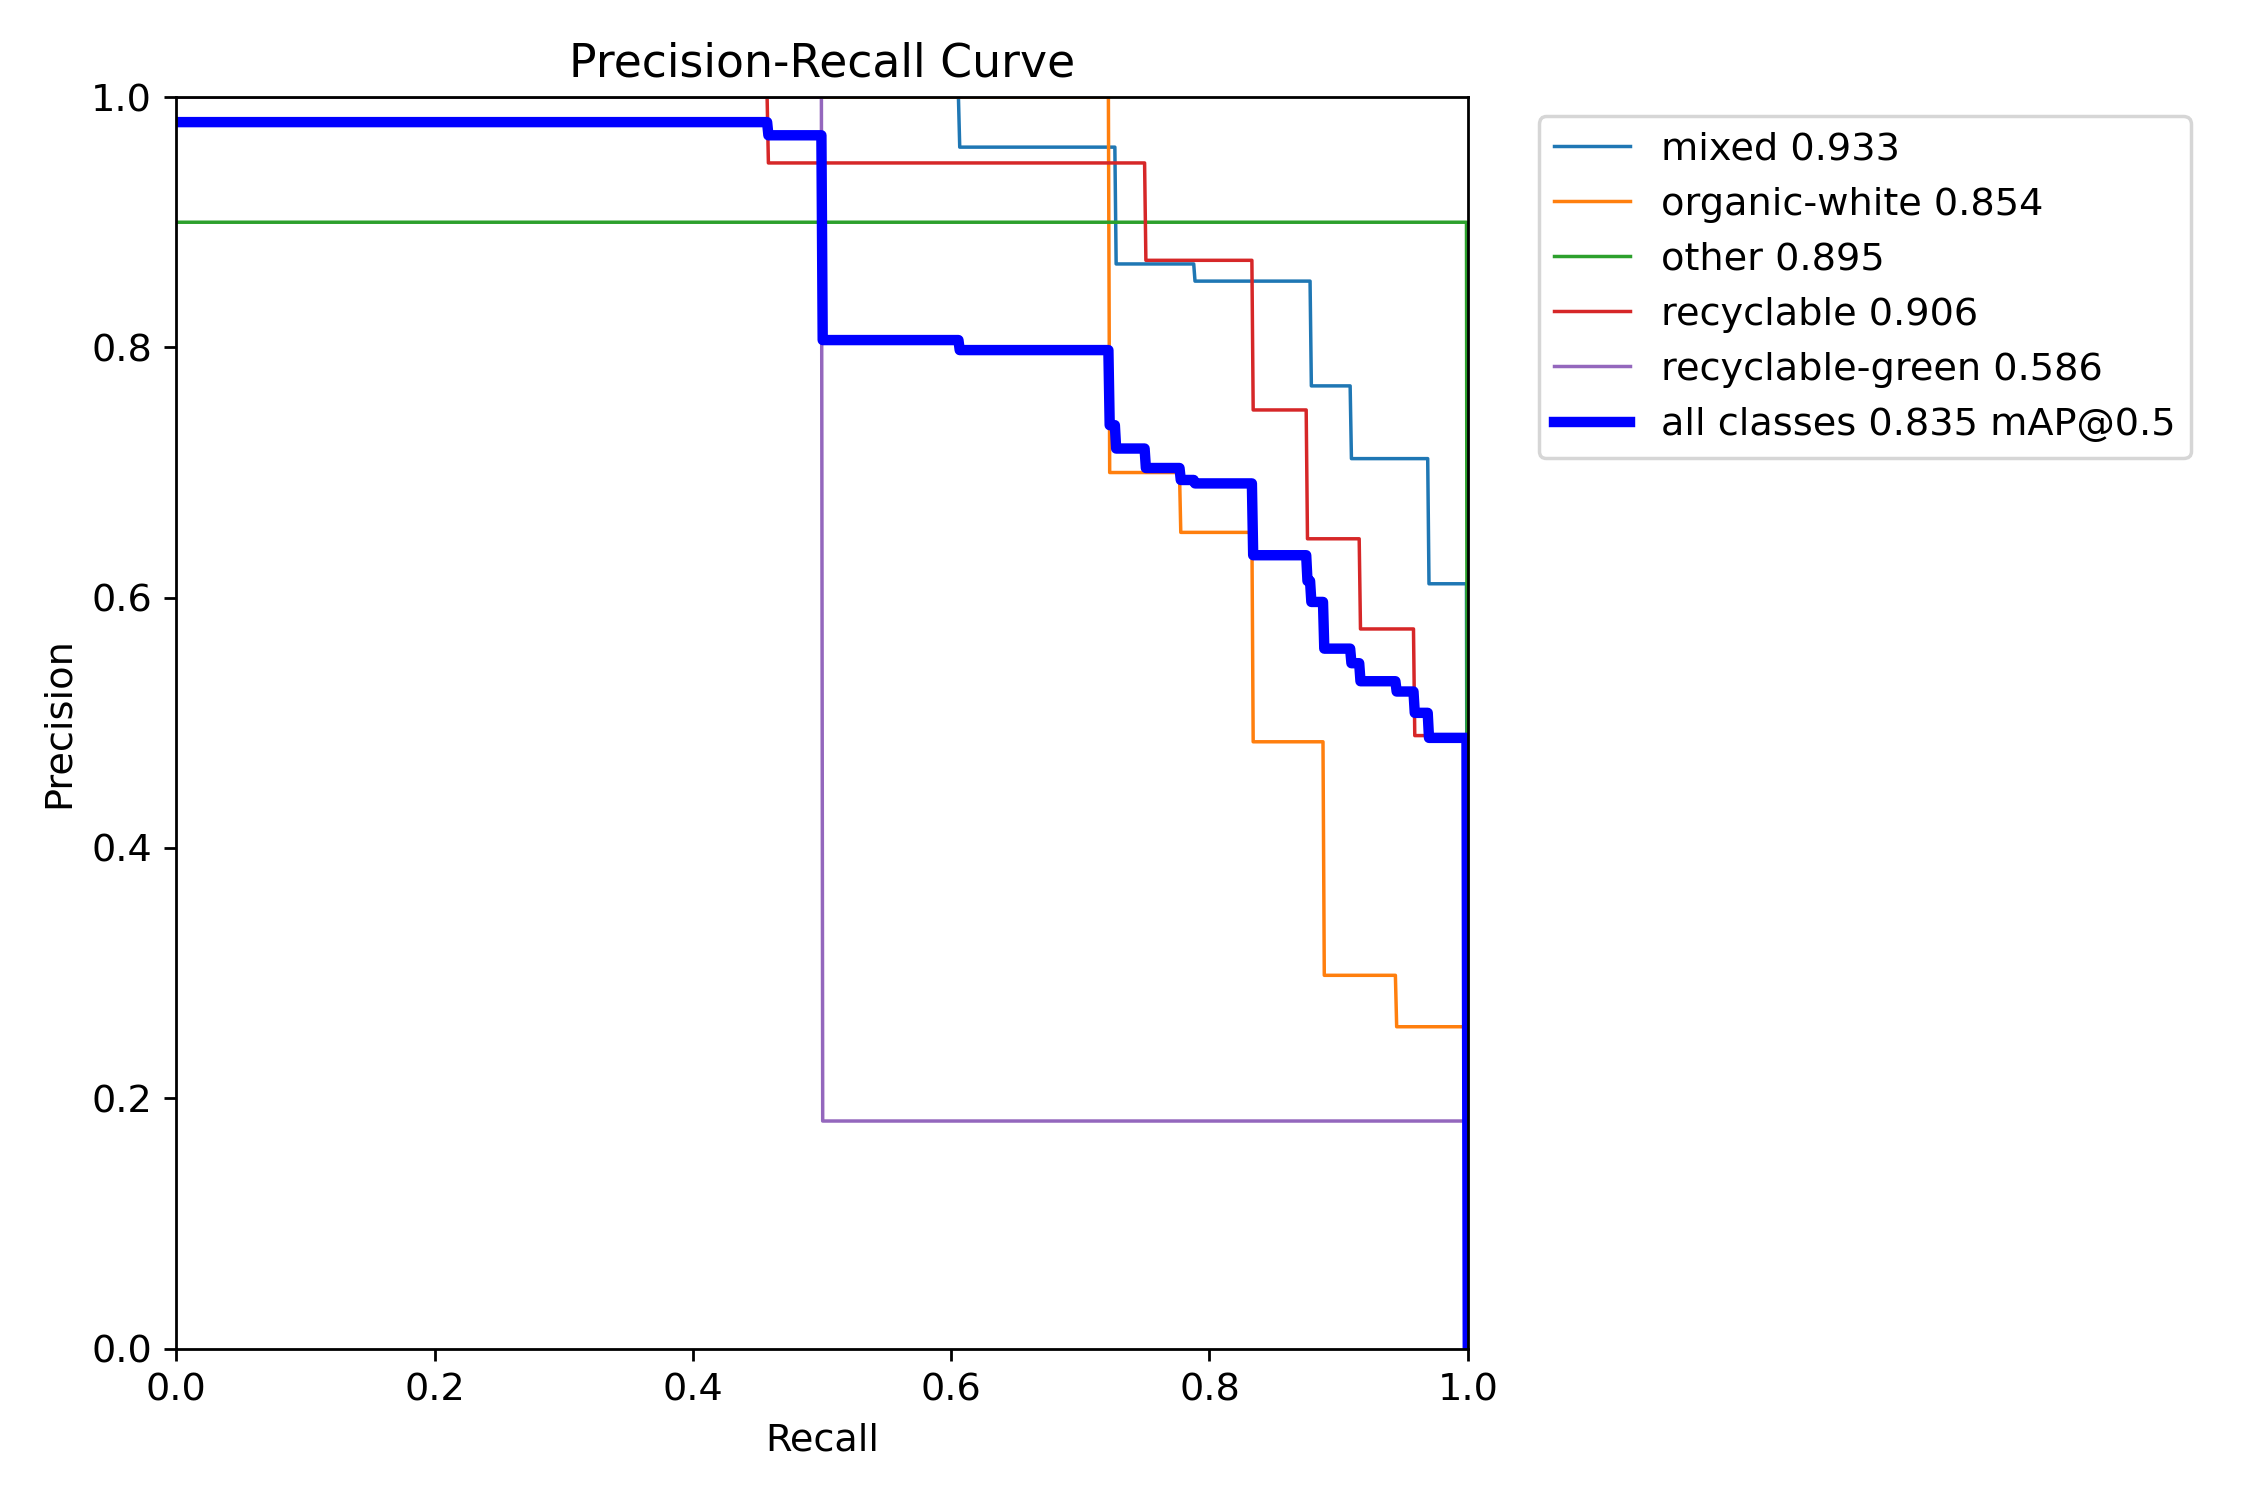

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/PR_curve.png', width=600)

/content


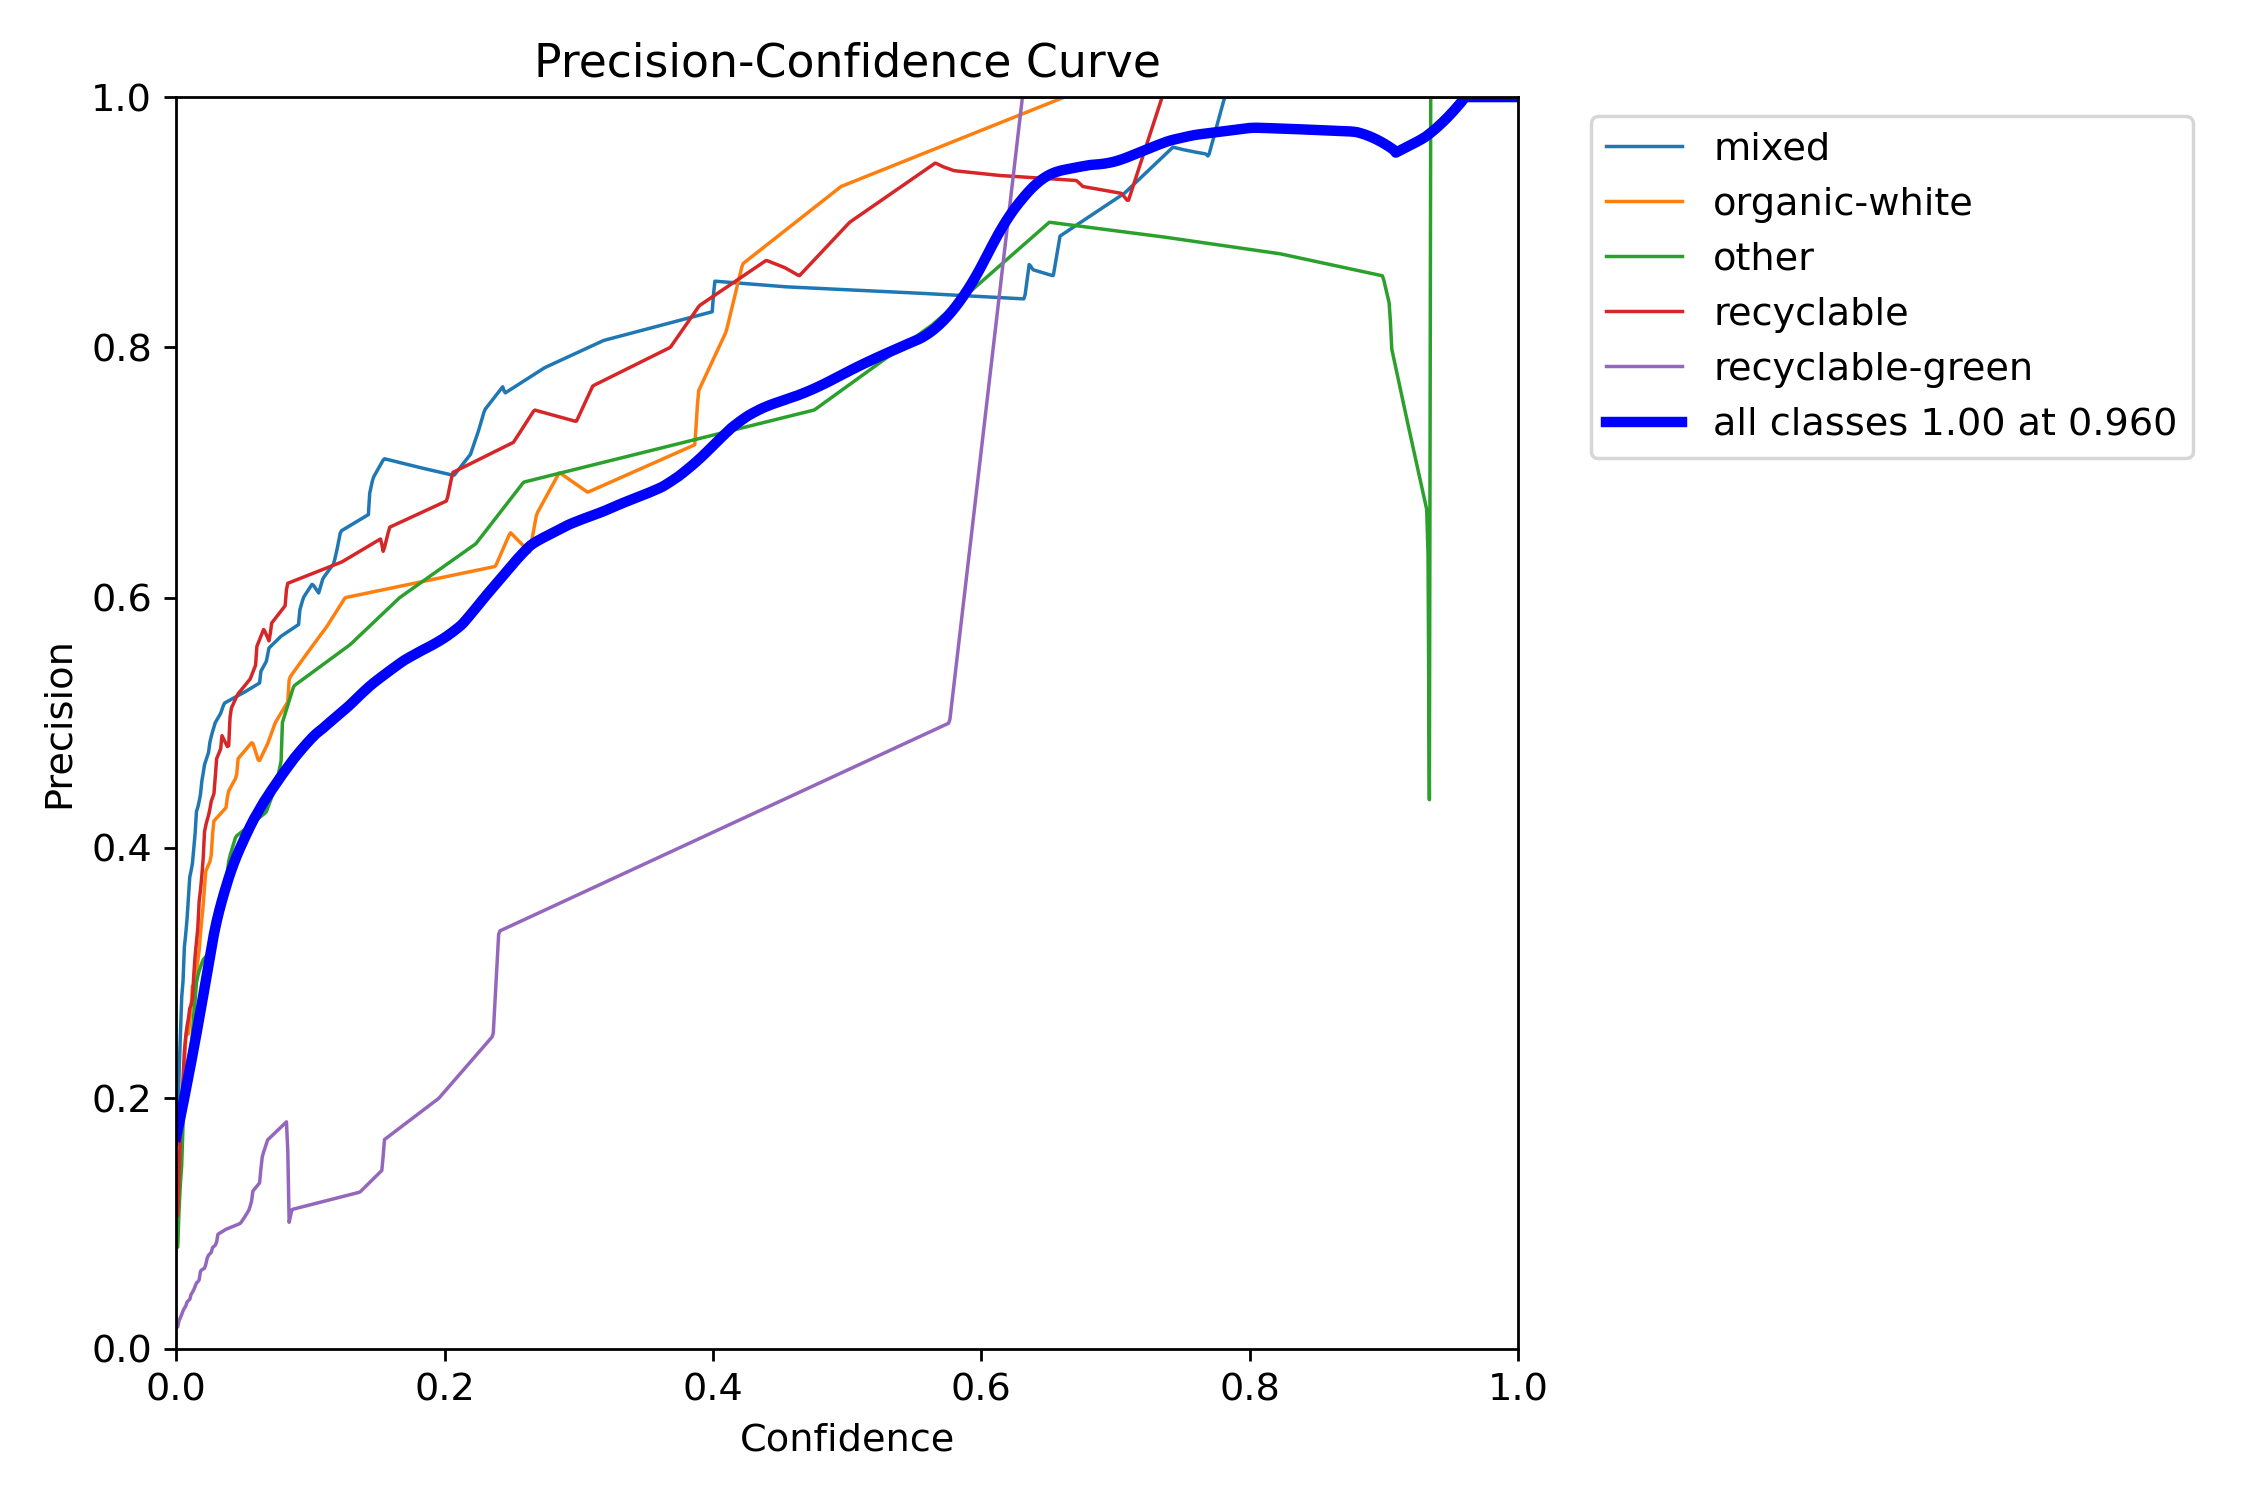

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/P_curve.png', width=600)

/content


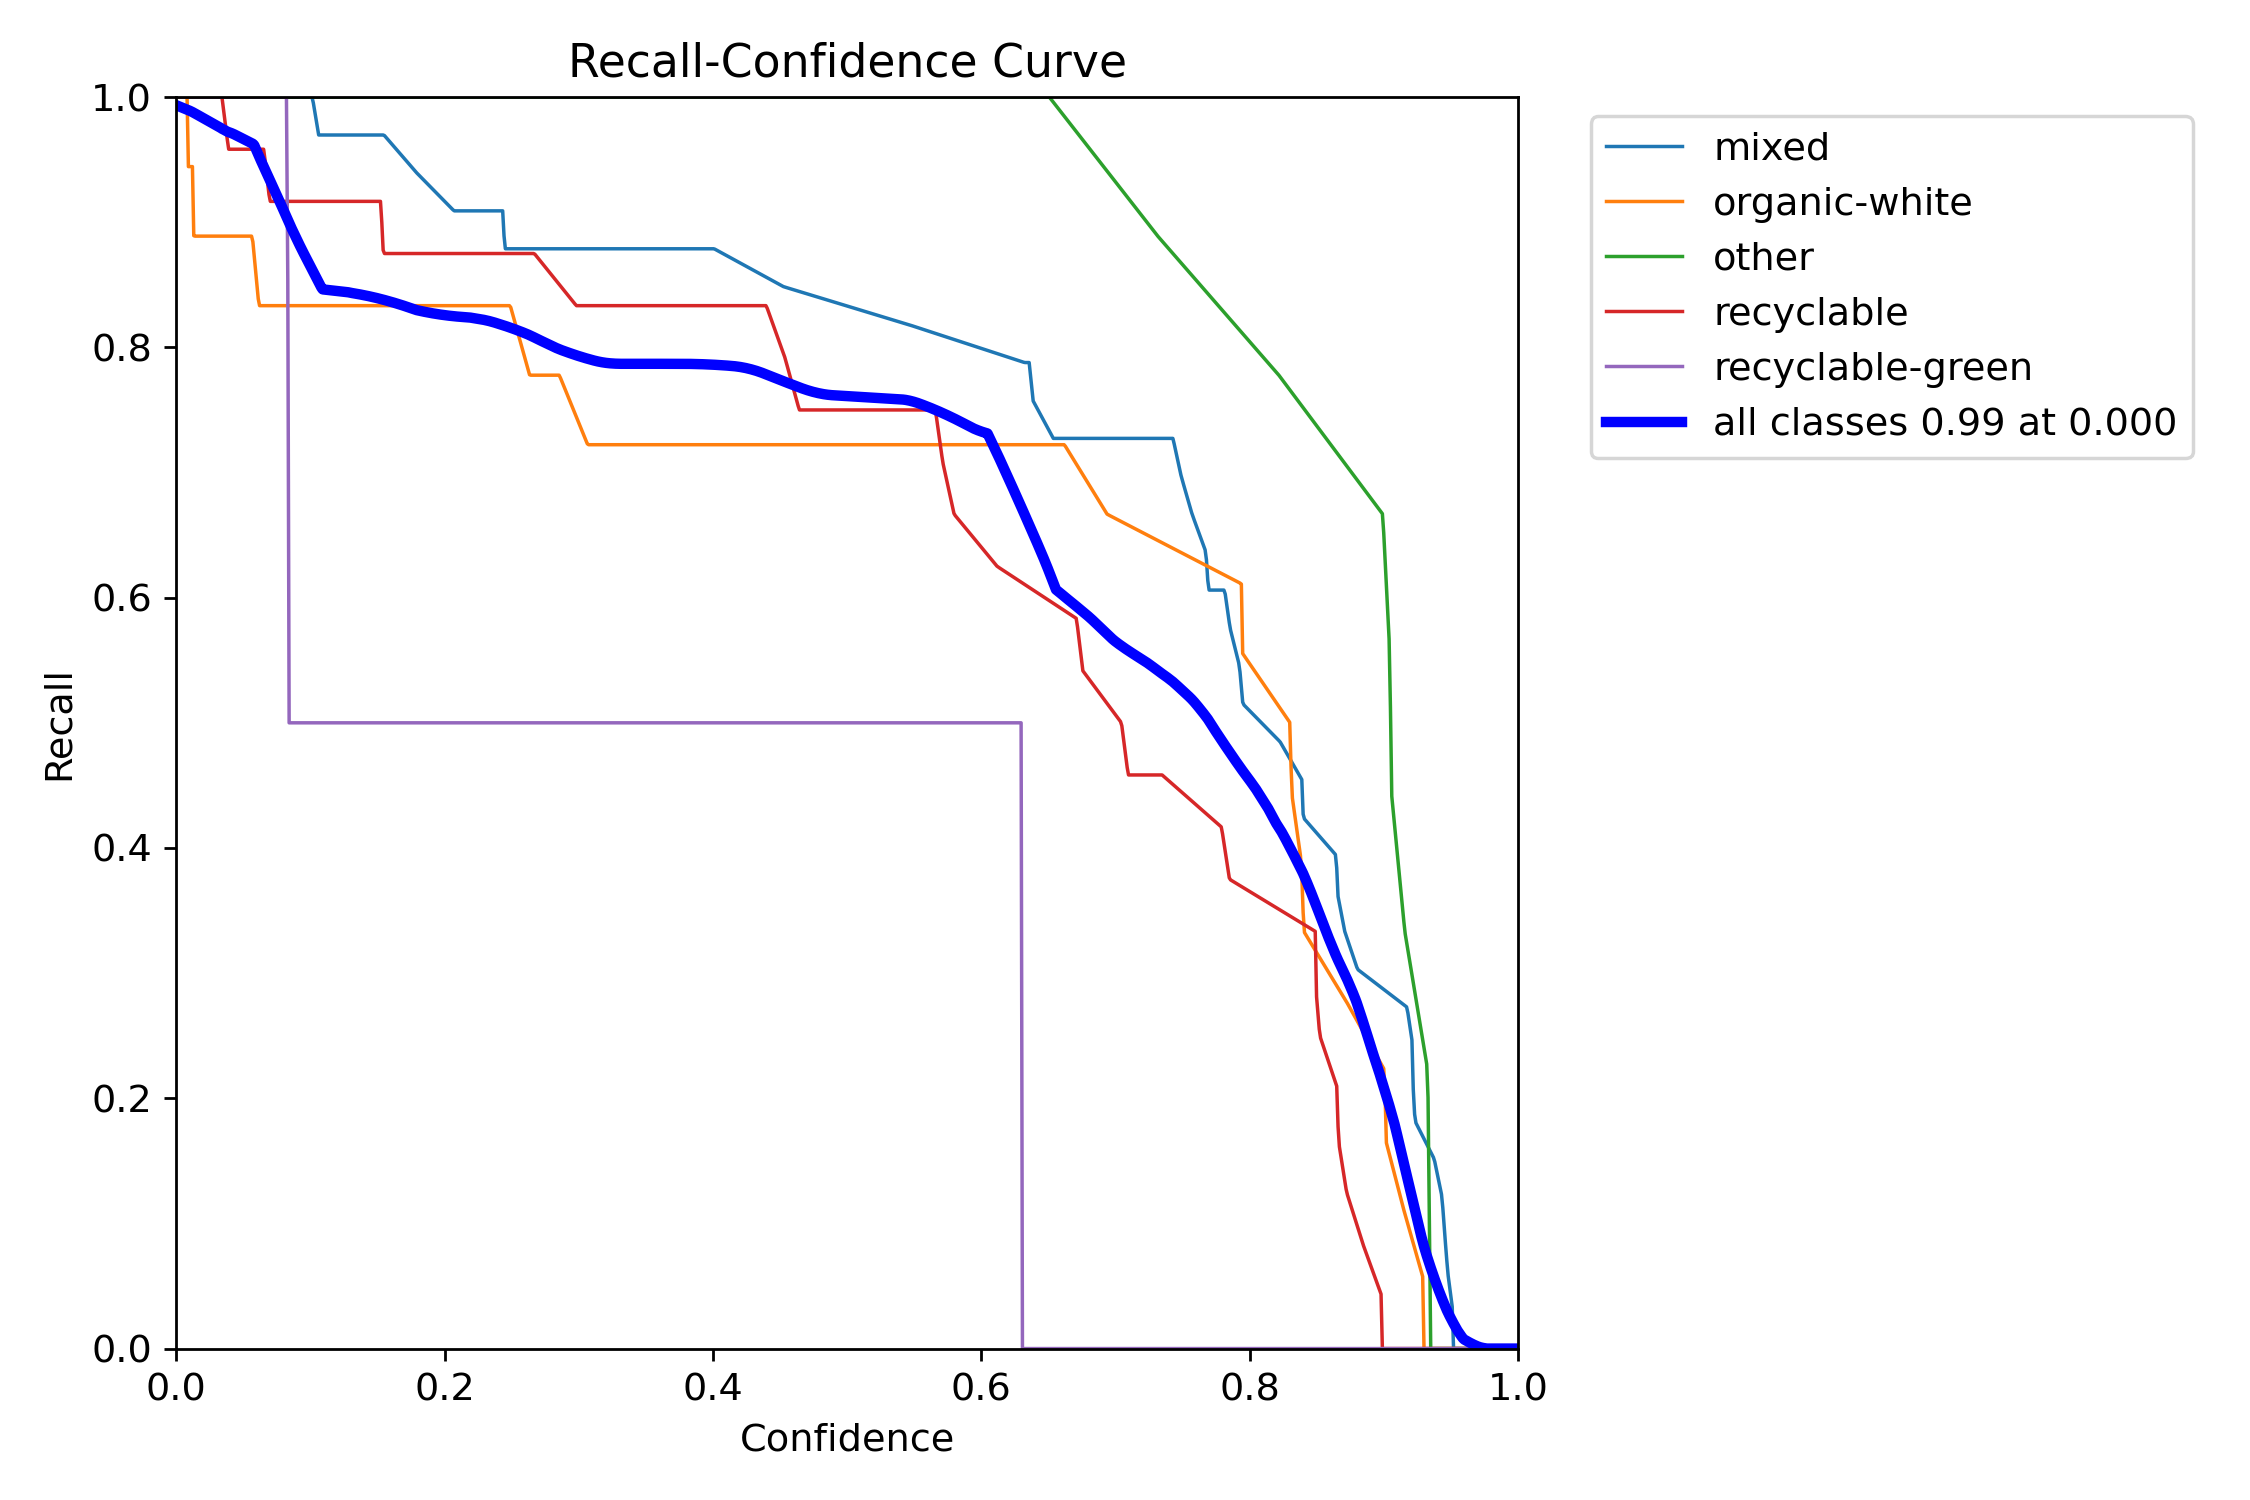

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/R_curve.png', width=600)

# Testing model on test image

## Choosing a random image

In [ ]:
test_images_path = f'{dataset.location}/test/images'
images_list = [image_file for image_file in os.listdir(test_images_path) if os.path.isfile(os.path.join(test_images_path, image_file)) and (image_file.endswith('.jpg') or image_file.endswith('.png'))]
chosen_image = random.choice(images_list)
chosen_image_path = os.path.join(test_images_path, chosen_image)

## Loading Image

Pillow method

In [ ]:
chosen_image = ImagePIL.open(chosen_image_path)

OpenCV method

In [ ]:
chosen_image = cv2.imread(chosen_image_path)

## Predicting results on Image

CLI method

In [ ]:
!yolo detect predict model={HOME}/runs/detect/train/weights/best.pt source={chosen_image_path} save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/datasets/Waste-Bag-Detection-3/test/images/IMG_20241206_081943_jpg.rf.c54c70daac12cb9e37a34895b77b4583.jpg: 736x960 2 others, 37.3ms
Speed: 8.0ms preprocess, 37.3ms inference, 617.6ms postprocess per image at shape (1, 3, 736, 960)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


Python method

In [ ]:
model = ultralytics.YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

results = model.predict(chosen_image, save=True)

detections = results[0].boxes

total_detections = len(detections)

print(f"Total number of detected bags: {total_detections}")


0: 736x960 3 recyclables, 27.2ms
Speed: 6.9ms preprocess, 27.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 960)
Results saved to runs/detect/predict24
Total number of detected bags: 3


## Loading predicted image

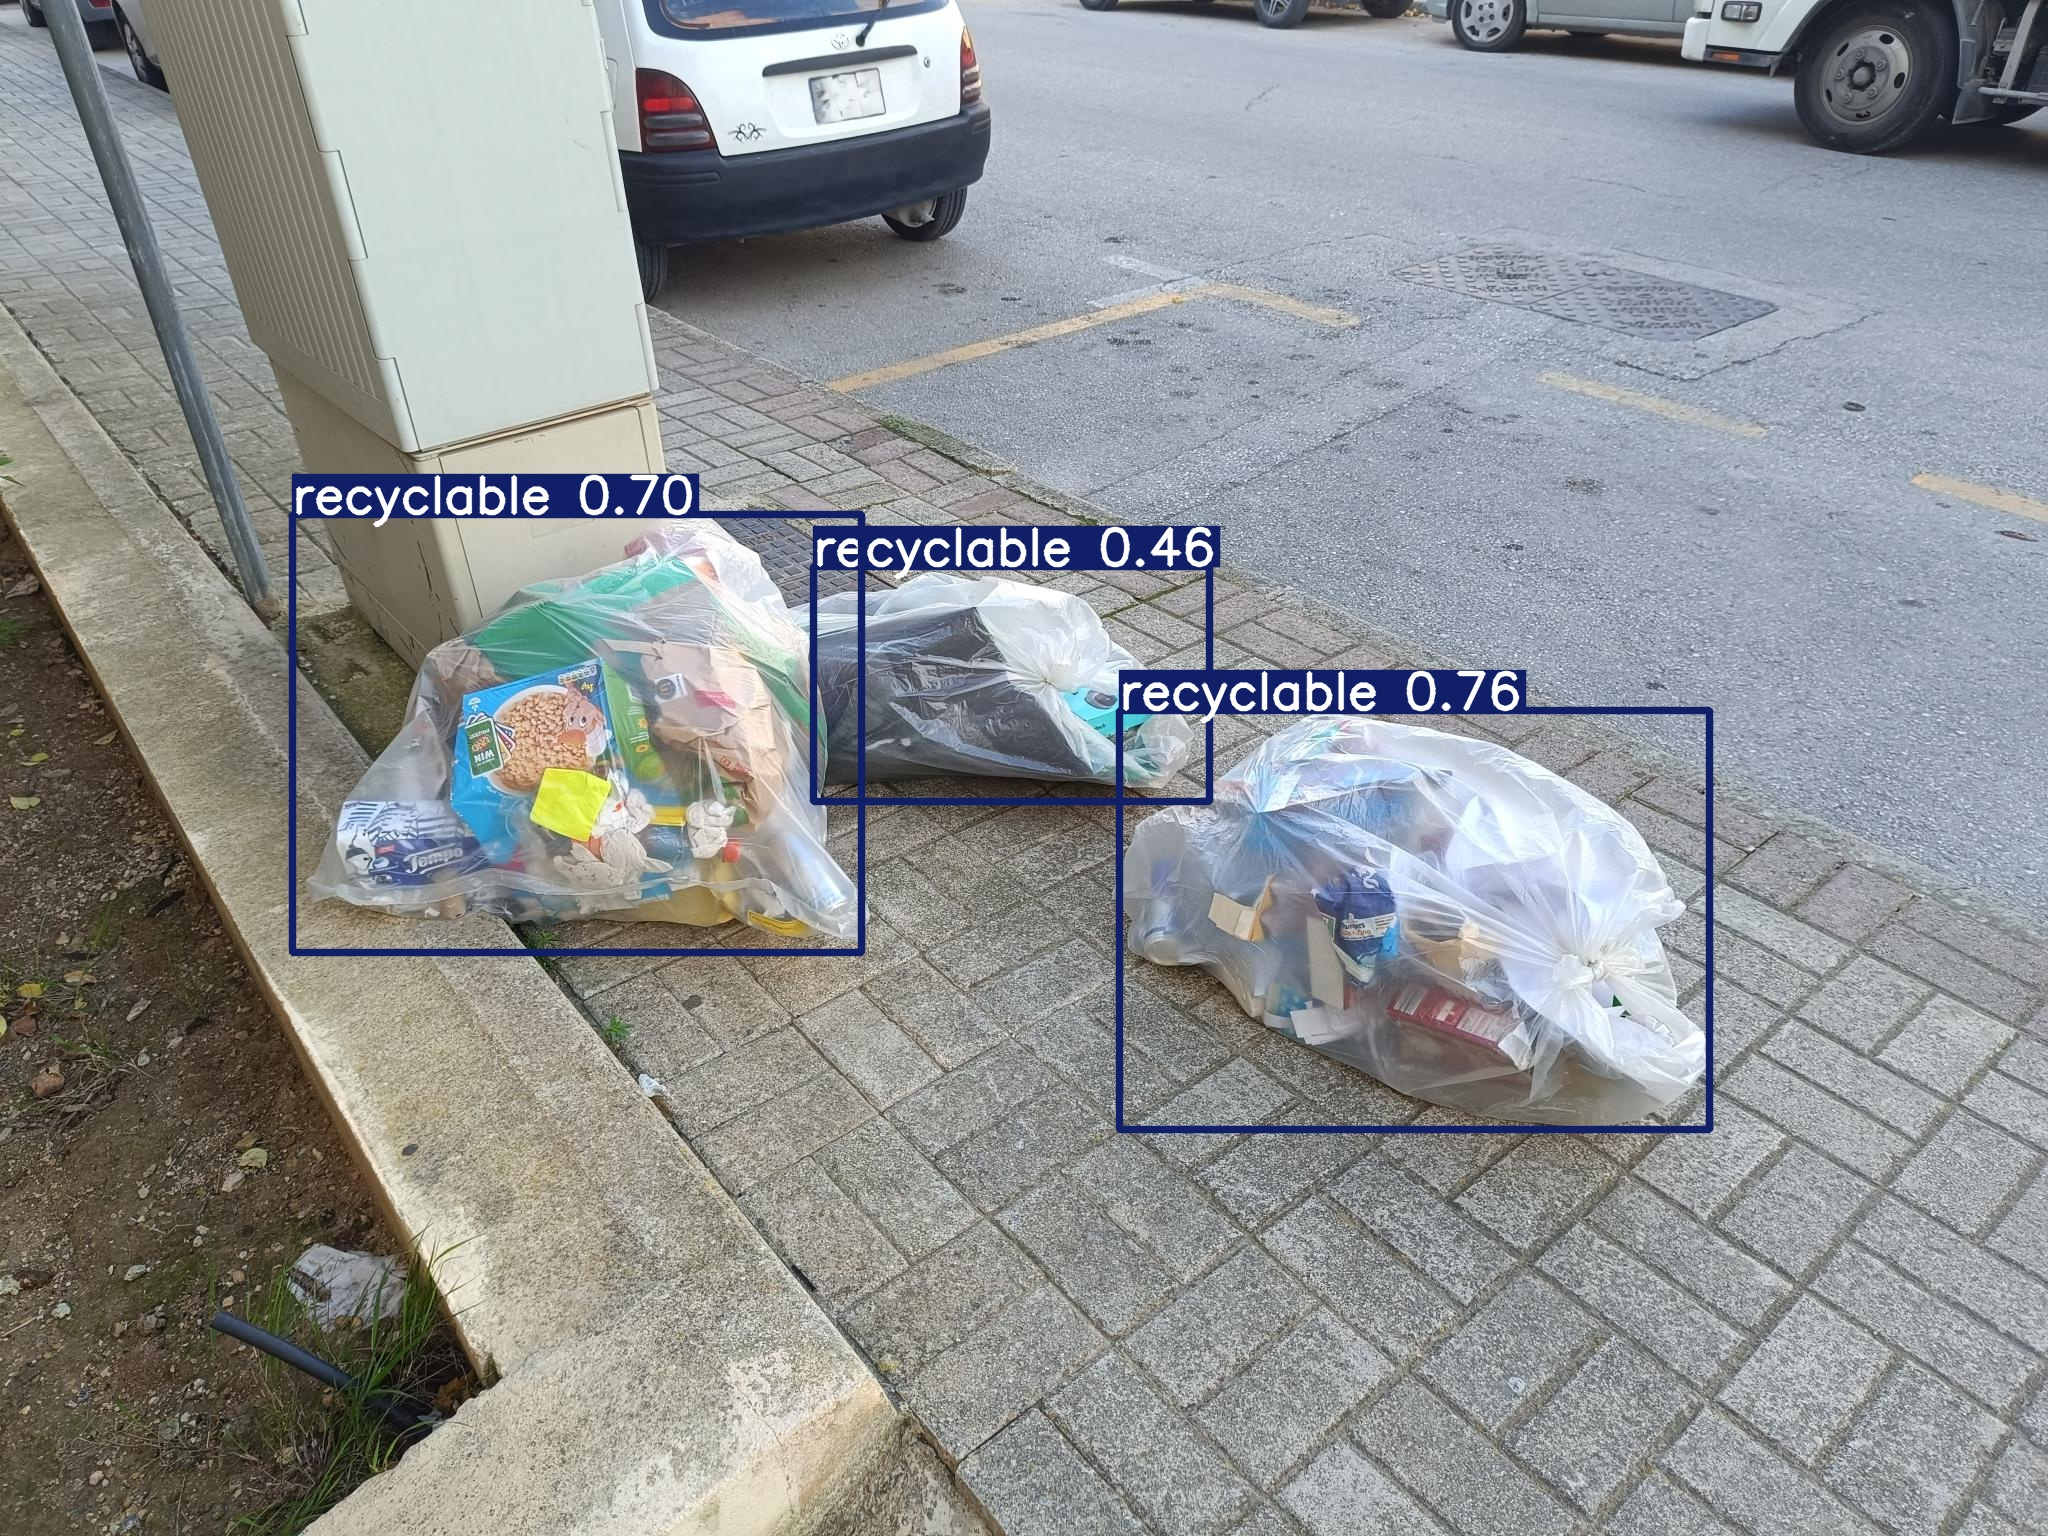

In [ ]:
disp(Image(f'{HOME}/runs/detect/predict24/image0.jpg'))